In [1]:
# Imports and initial setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
plt.style.use('fivethirtyeight')
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import seaborn as sns
import time
from IPython.display import Image
import matplotlib as mpl
# Undersampling and Oversampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb

# Metrics & Corss-Validation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, make_scorer, classification_report, confusion_matrix)
import statsmodels
import matplotlib.pyplot as plt
import folium
#from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
#from pandas_profiling import ProfileReport
#import plotly.express as px
#import pprint
#import plotly.graph_objs as go
#import matplotlib as mpl
#import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/Cleaned_dataset.csv',low_memory=False)

In [3]:
print('The dataset has {:3,d} samples and {} features'.format(*data.shape))

The dataset has 77,416 samples and 71 features


In [4]:
#replace all questions marks "?" with NaN
data.replace("?", np.nan, inplace = True)
#evaluate missing data or "NAN" 
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

Unnamed: 0
False    77416
Name: Unnamed: 0, dtype: int64
-----------------------------------
X
False    77416
Name: X, dtype: int64
-----------------------------------
Y
False    77416
Name: Y, dtype: int64
-----------------------------------
OBJECTID
False    77416
Name: OBJECTID, dtype: int64
-----------------------------------
ACCIDENT_NO
False    77416
Name: ACCIDENT_NO, dtype: int64
-----------------------------------
ABS_CODE
False    77416
Name: ABS_CODE, dtype: int64
-----------------------------------
ACCIDENT_STATUS
False    77416
Name: ACCIDENT_STATUS, dtype: int64
-----------------------------------
ACCIDENT_DATE
False    77416
Name: ACCIDENT_DATE, dtype: int64
-----------------------------------
ACCIDENT_TIME
False    77416
Name: ACCIDENT_TIME, dtype: int64
-----------------------------------
ALCOHOLTIME
False    77416
Name: ALCOHOLTIME, dtype: int64
-----------------------------------
ACCIDENT_TYPE
False    77416
Name: ACCIDENT_TYPE, dtype: int64
-------------------------

In [5]:
pd.set_option('max_column' ,None)

In [6]:
data

,Unnamed: 0,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME,month,weekend,hour,time_of_day,accident_seriousness
0,0,2498217.170,2454870.252,1,T20140013514,ABS to receive accident,Unfinished,2014-07-01,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,No,Day,Yes,Unknown,Other injury accident,60 km/hr,No,49465,144.979861,-37.406699,Intersection,MITCHELL,NORTHERN REGION,2498217.170,2454870.252,4.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,1.0,2.0,0.0,2.0,0.0,0.0,TOWNS,TOWNS,MITCHELL,NORTHERN REGION,B,B,Arterial Highway,"Local Road,Arterial Highway",Undivided,Undivided,Country,7,0,13,3,Injury
1,1,2502934.960,2423005.289,2,T20140013549,ABS to receive accident,Finished,2014-07-02,00:01:00,Yes,Collision with vehicle,Wednesday,U TURN,No,Dark Street lights on,Yes,Not at intersection,Other injury accident,60 km/hr,No,272595,-1.000000,-1.000000,Non-Intersection,WHITTLESEA,METROPOLITAN NORTH WEST REGION,2502934.960,2423005.289,4.0,3.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,2.0,0.0,2.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,B,B,Arterial Other,Arterial Other,Undivided,Undivided,Metro,7,0,0,7,Injury
2,2,2520154.039,2395621.674,3,T20140013561,ABS to receive accident,Finished,2014-07-02,08:30:00,No,collision with some other object,Wednesday,STRUCK OBJECT ON CARRIAGEWAY,No,Dusk/Dawn,Yes,Not at intersection,Other injury accident,50 km/hr,No,273609,-1.000000,-1.000000,Non-Intersection,KNOX,METROPOLITAN SOUTH EAST REGION,2520154.039,2395621.674,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,0.0,1.0,0.0,0.0,MELB_URBAN,MELB_URBAN,KNOX,METROPOLITAN SOUTH EAST REGION,B,B,Local Road,Local Road,Undivided,Undivided,Metro,7,0,8,1,Injury
3,3,2473719.463,2402357.319,4,T20140013563,ABS to receive accident,Finished,2014-07-02,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),Yes,Unk.,No,Cross intersection,Other injury accident,Not known,No,44382,-1.000000,-1.000000,Intersection,WYNDHAM,METROPOLITAN NORTH WEST REGION,2473719.463,2402357.319,3.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,2.0,0.0,2.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,C,C,Arterial Other,"Arterial Other,Local Road",Divided,"Undivided,Divided",Metro,7,0,10,2,Injury
4,4,2484073.998,2409123.682,5,T20140013567,ABS to receive accident,Finished,2014-07-02,09:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,Day,Yes,Cross intersection,Other injury accident,60 km/hr,No,38531,-1.000000,-1.000000,Intersection,WYNDHAM,METROPOLITAN NORTH WEST REGION,2484073.998,2409123.682,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No,0.0,2.0,1.0,1.0,0.0,0.0,MELB_URBAN,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,C,C,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro,7,0,9,1,Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77411,77508,2508396.126,2431509.354,77509,T20200005929,ABS to rec

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77416 entries, 0 to 77415
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            77416 non-null  int64  
 1   X                     77416 non-null  float64
 2   Y                     77416 non-null  float64
 3   OBJECTID              77416 non-null  int64  
 4   ACCIDENT_NO           77416 non-null  object 
 5   ABS_CODE              77416 non-null  object 
 6   ACCIDENT_STATUS       77416 non-null  object 
 7   ACCIDENT_DATE         77416 non-null  object 
 8   ACCIDENT_TIME         77416 non-null  object 
 9   ALCOHOLTIME           77416 non-null  object 
 10  ACCIDENT_TYPE         77416 non-null  object 
 11  DAY_OF_WEEK           77416 non-null  object 
 12  DCA_CODE              77416 non-null  object 
 13  HIT_RUN_FLAG          77416 non-null  object 
 14  LIGHT_CONDITION       77416 non-null  object 
 15  POLICE_ATTEND      

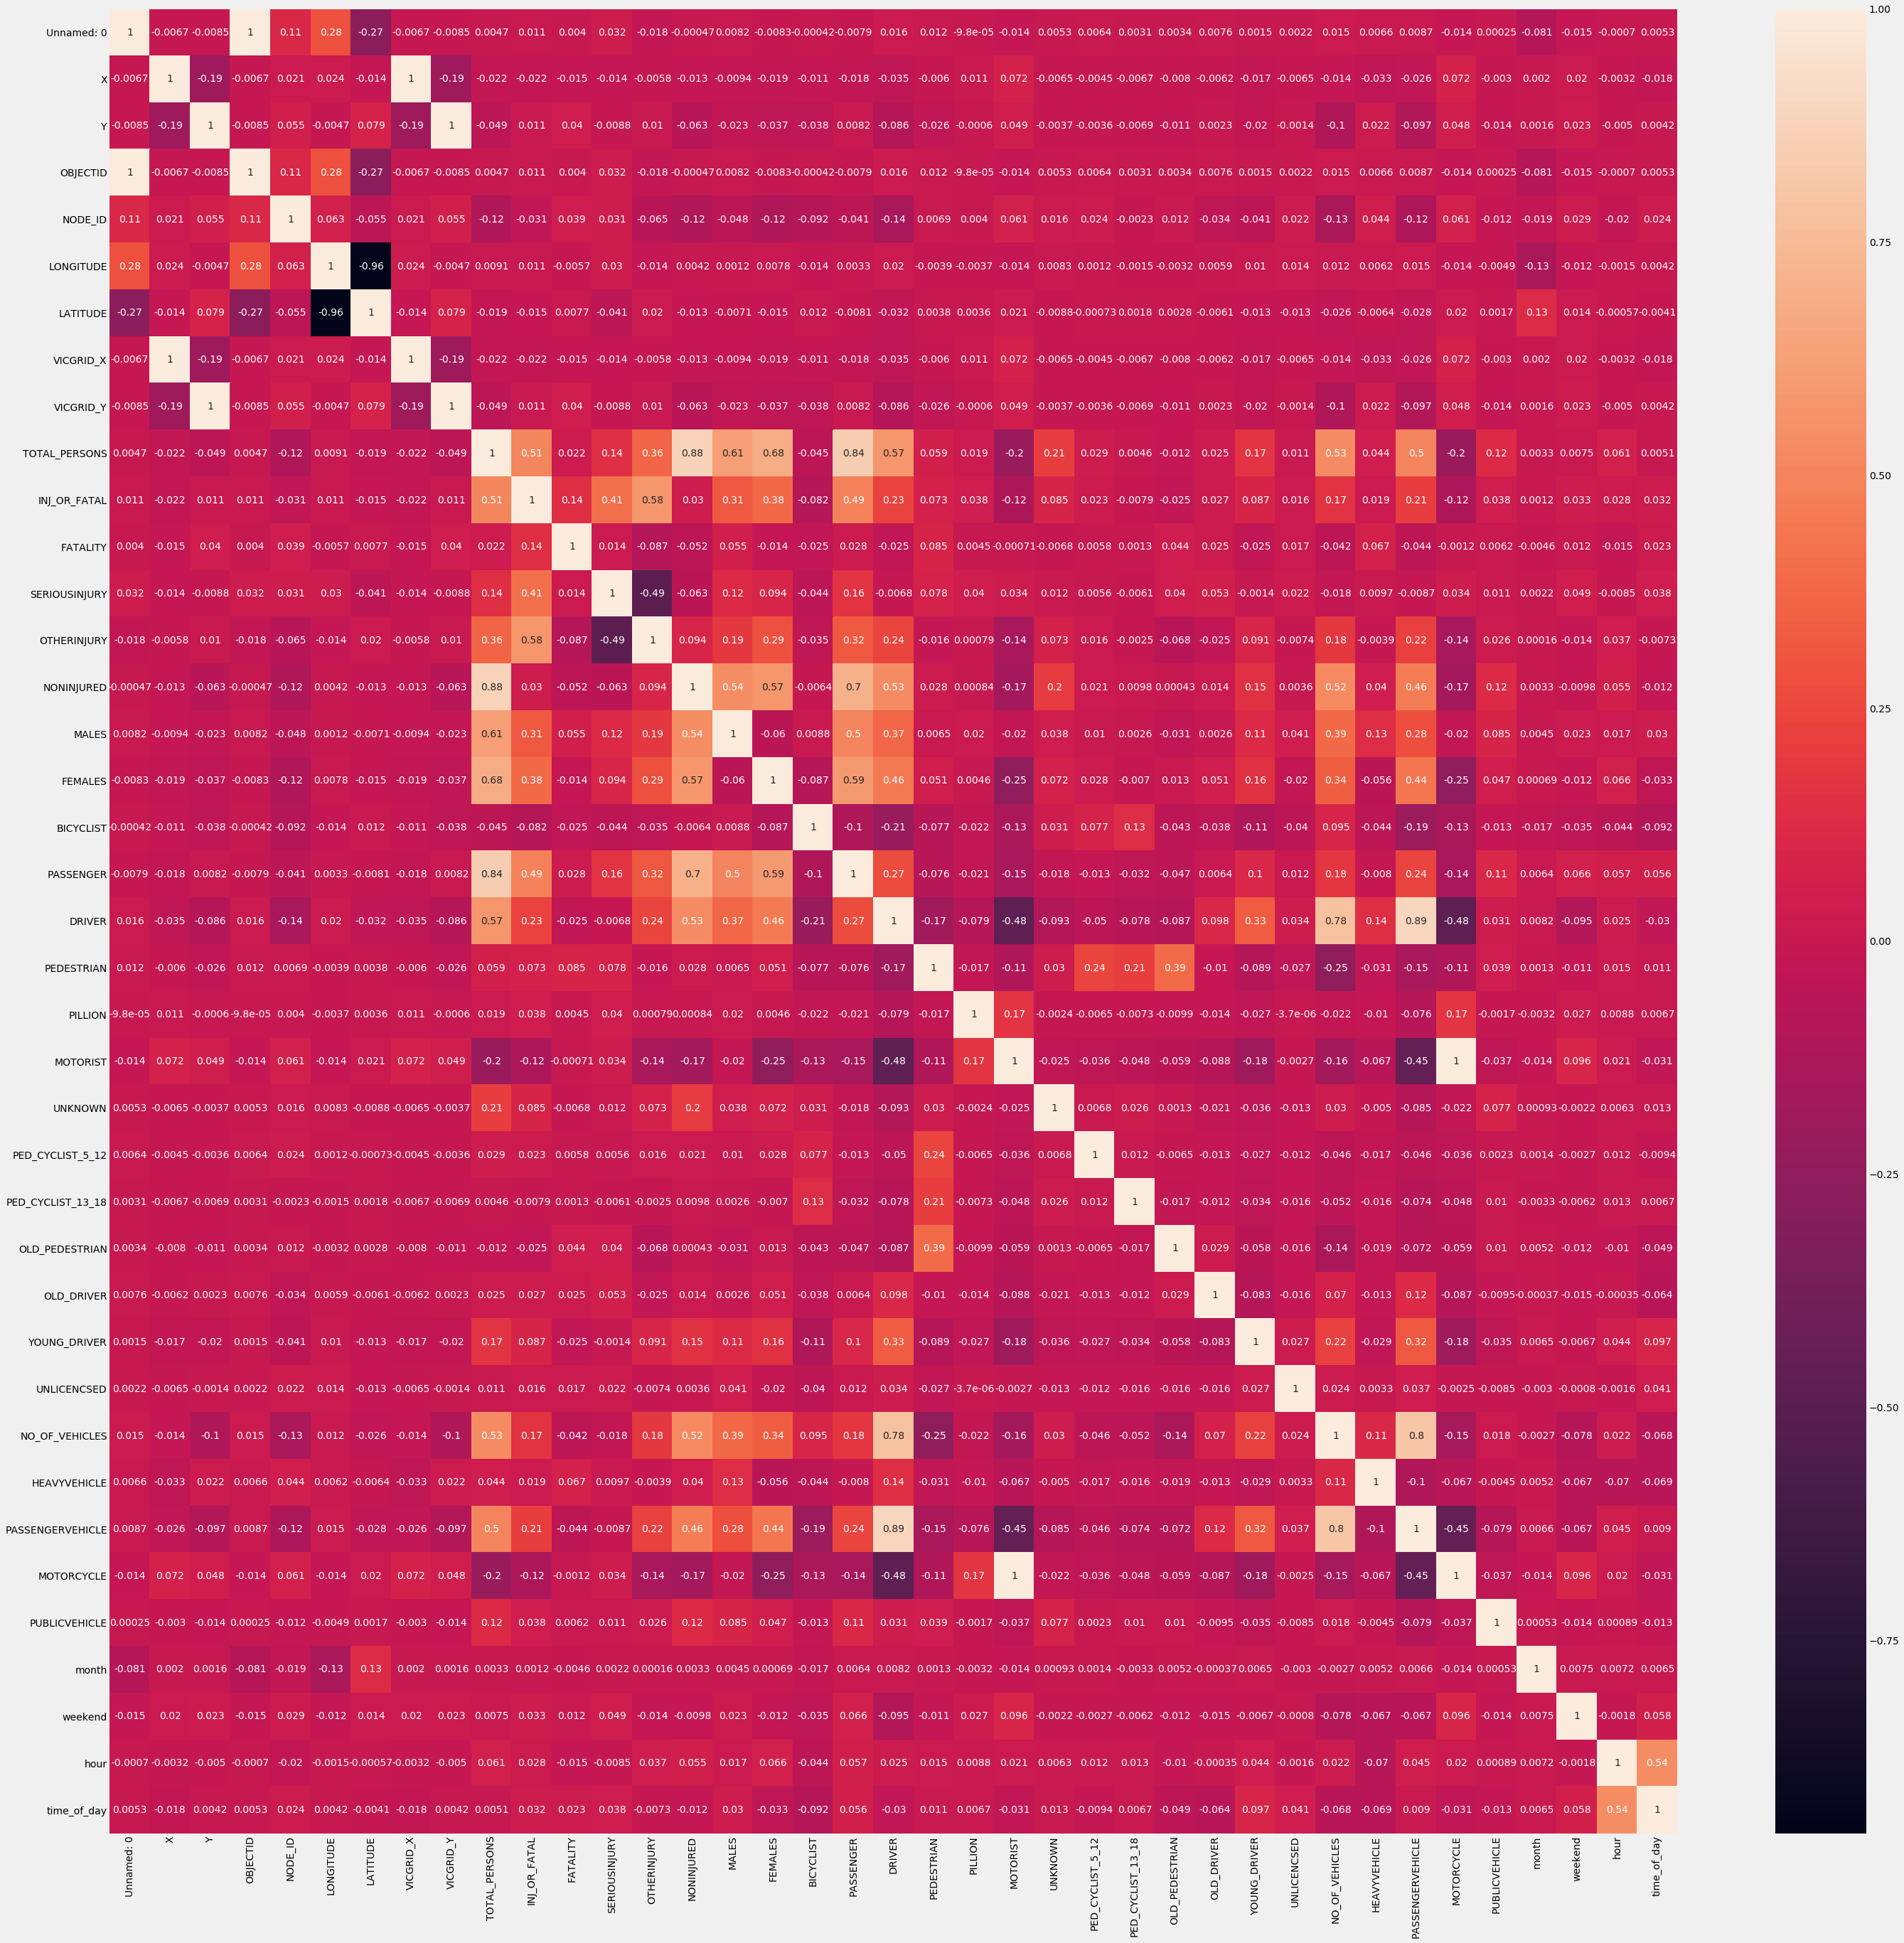

In [8]:
plt.figure(figsize=(44,44))
sns.heatmap(data.corr(),annot=True)

# Biggest take-away from Seaborn heatmaps: severity code has highest correlation with pedestrian and vehicle count. Makes
# sense - many of the features are categorical

In [9]:
#SEVERITYDESC provides a description of the severity code
print("Road severity description types : ",data['accident_seriousness'].value_counts())

Road severity description types :  Injury           44909
Serious/Fatal    32507
Name: accident_seriousness, dtype: int64


In [10]:
#SEVERITYDESC provides a description of the severity code
print("Road severity description types : ",data['SEVERITY'].value_counts())

Road severity description types :  Other injury accident      44906
Serious injury accident    30916
Fatal accident              1591
Non injury accident            3
Name: SEVERITY, dtype: int64


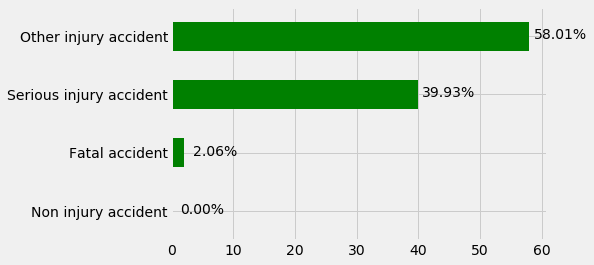

In [17]:
plot_data = create_plot_data(data, 'SEVERITY')
plot_and_annotate(plot_data, color='green')

In [12]:
# Print markdown programatically for better visualization.
def printmd(string):
    display(Markdown(string))

In [13]:
# Plots and creates labels for values plotted. Used for exploration of features.
def plot_and_annotate(data, **kwarg):
    ax = data['percent'].sort_values().plot(kind='barh', **kwarg)
    for p in ax.patches:
        width = p.get_width()
        plt.text(5 + width, p.get_y() + 0.55 * p.get_height(),
                 '{:1.2f}%'.format(width),
                 ha='center', va='center')


In [14]:
# Creates percentages for value_counts of a pd.series object.
def create_count_percentages(series, name=None):
    values = series.value_counts()
    expanded_value = values.to_frame(name)
    expanded_value['percent'] = values.apply(lambda _: _ / series.size * 100)
    return expanded_value


In [15]:
# Data must be loaded before definin create_plot_data due to inside reference.
def create_plot_data(data, feature):
    return create_count_percentages(data[feature], name=feature)


In [16]:
def cast_df_features(data, feature_catalog):
    def parse_type(dtype):
        if dtype == 'int':
            return np.int8
        elif dtype == 'float':
            return np.float
        else:
            return dtype

    # Make a dict to use as dtypes for panda's dataframe
    features_dtypes = feature_catalog.set_index('feature_name')['pandas_dtype'].apply(parse_type).to_dict()
    # Keep only the columns that remain in the clean version of the dataframe
    features_dtypes = {k: v for k, v in features_dtypes.items() if k in data.columns}
    return data.astype(features_dtypes)

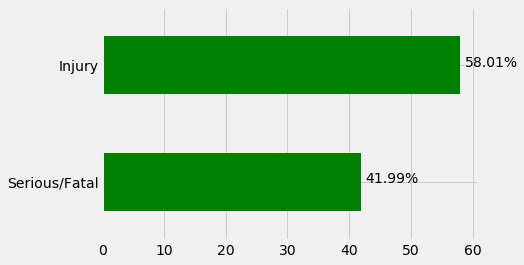

In [15]:
plot_data = create_plot_data(data, 'accident_seriousness')
plot_and_annotate(plot_data, color='green')

In [16]:
data.accident_seriousness.value_counts()

Injury           44909
Serious/Fatal    32507
Name: accident_seriousness, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77416 entries, 0 to 77415
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            77416 non-null  int64  
 1   X                     77416 non-null  float64
 2   Y                     77416 non-null  float64
 3   OBJECTID              77416 non-null  int64  
 4   ACCIDENT_NO           77416 non-null  object 
 5   ABS_CODE              77416 non-null  object 
 6   ACCIDENT_STATUS       77416 non-null  object 
 7   ACCIDENT_DATE         77416 non-null  object 
 8   ACCIDENT_TIME         77416 non-null  object 
 9   ALCOHOLTIME           77416 non-null  object 
 10  ACCIDENT_TYPE         77416 non-null  object 
 11  DAY_OF_WEEK           77416 non-null  object 
 12  DCA_CODE              77416 non-null  object 
 13  HIT_RUN_FLAG          77416 non-null  object 
 14  LIGHT_CONDITION       77416 non-null  object 
 15  POLICE_ATTEND      

In [18]:
# prepare dataframe with simple counts
counts = data.groupby(['ACCIDENT_STATUS', 'accident_seriousness']).size()

counts = counts.rename_axis(['ACCIDENT_STATUS', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
ACCIDENT_STATUS,,
Discarded,14,9
Finished,43532,31723
Private Property,617,679
Reopened,12,4
Unfinished,734,92


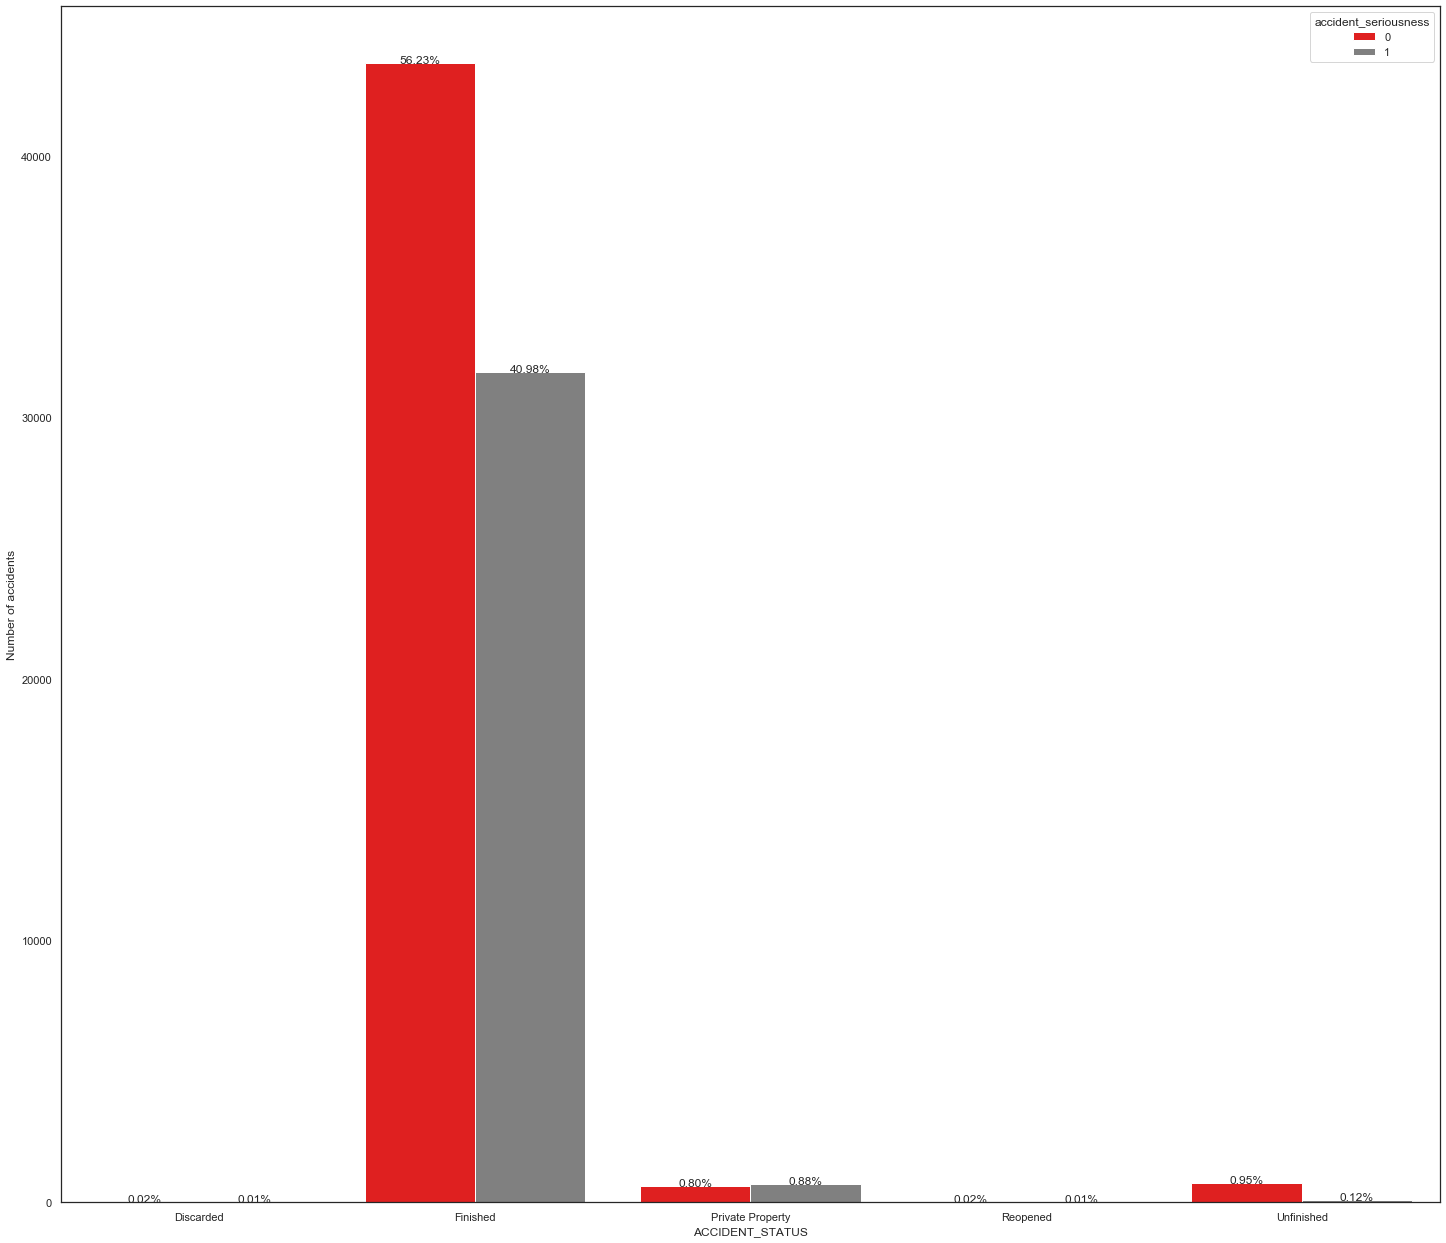

In [57]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="ACCIDENT_STATUS", hue="accident_seriousness",data=data)
ax.set(xlabel="ACCIDENT_STATUS",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [20]:
# prepare dataframe with simple counts
counts = data.groupby(['ACCIDENT_TIME', 'accident_seriousness']).size()

counts = counts.rename_axis(['ACCIDENT_TIME', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
ACCIDENT_TIME,,
00:00:00,26.0,19.0
00:01:00,19.0,24.0
00:02:00,3.0,5.0
00:03:00,5.0,2.0
00:04:00,2.0,4.0
...,...,...
23:55:00,24.0,19.0
23:56:00,NaN,2.0
23:57:00,5.0,1.0


In [21]:
# prepare dataframe with simple counts
counts = data.groupby(['ALCOHOLTIME', 'accident_seriousness']).size()

counts = counts.rename_axis(['ALCOHOLTIME', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
ALCOHOLTIME,,
No,29718,19842
Yes,15191,12665


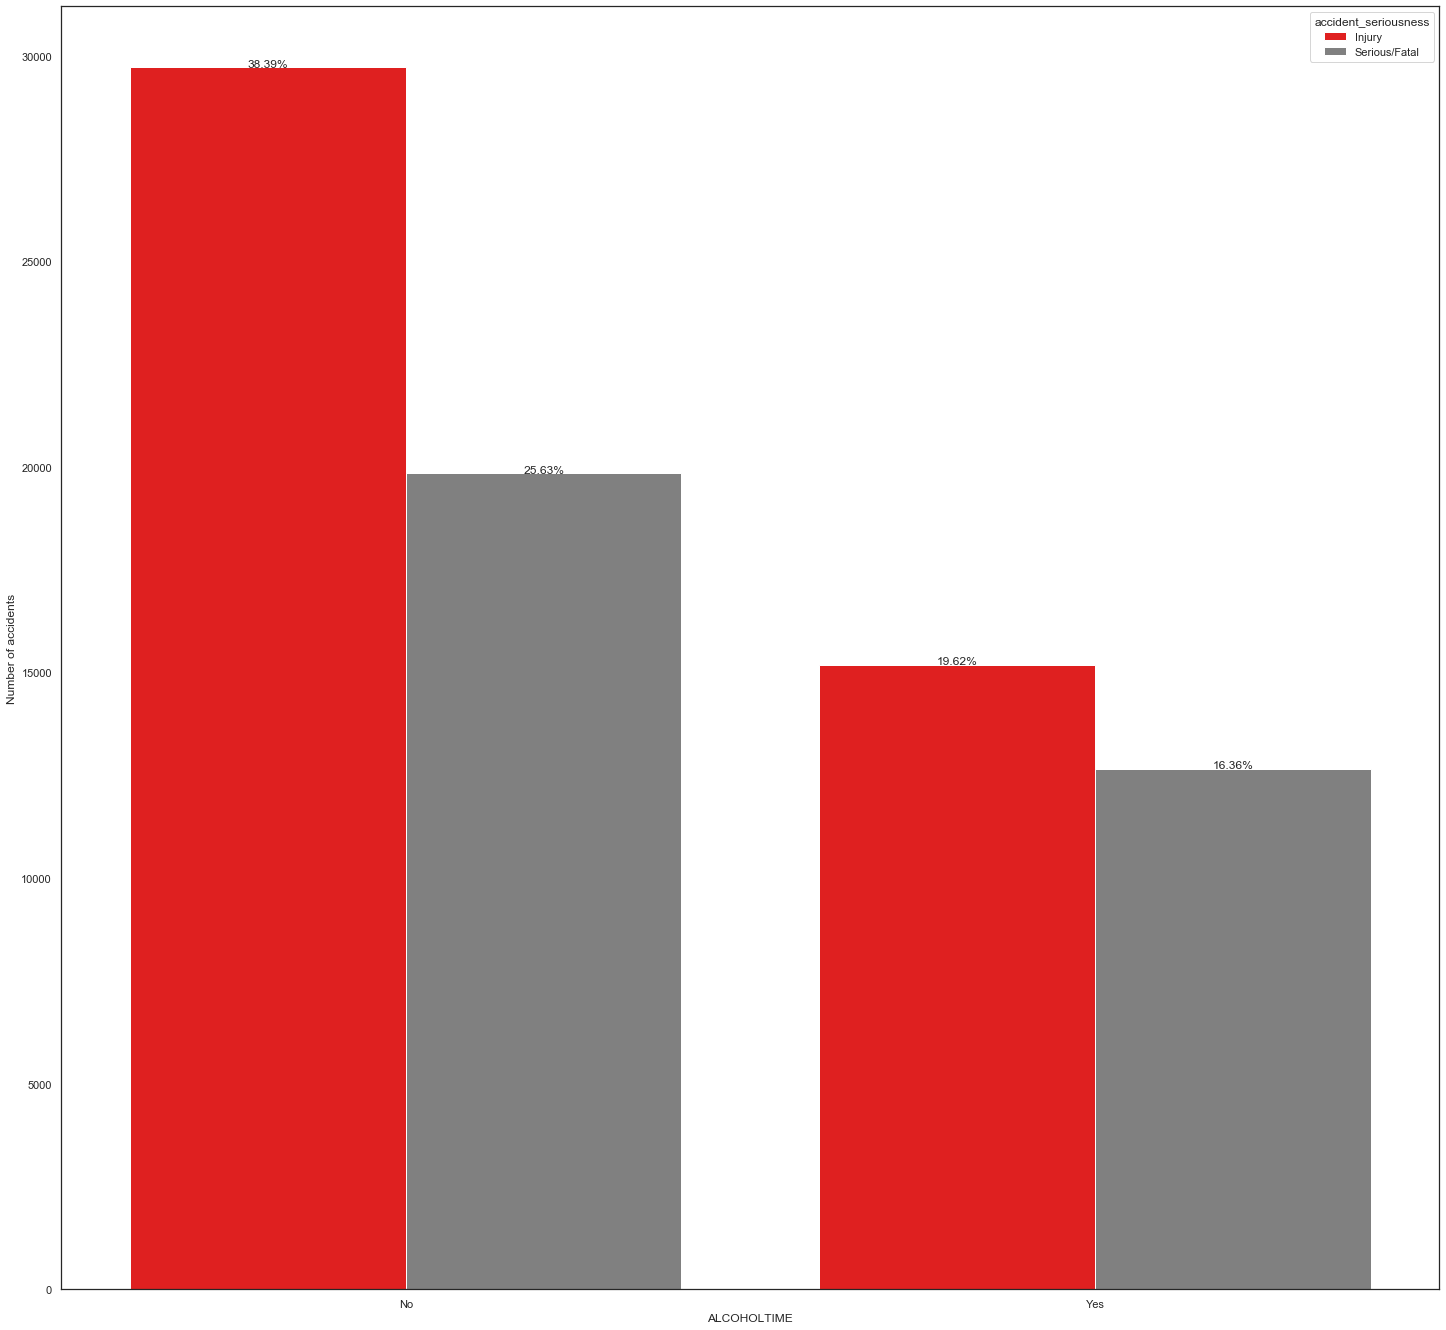

In [22]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="ALCOHOLTIME", hue="accident_seriousness",data=data)
ax.set(xlabel="ALCOHOLTIME",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [23]:
# prepare dataframe with simple counts
counts = data.groupby(['ACCIDENT_TYPE', 'accident_seriousness']).size()

counts = counts.rename_axis(['ACCIDENT_TYPE', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
ACCIDENT_TYPE,,
Collision with a fixed object,5680,6797
Collision with vehicle,29757,17308
Fall from or in moving vehicle,377,364
No collision and no object struck,2170,1676
Other accident,50,43
Struck Pedestrian,3725,3733
Struck animal,470,297
Vehicle overturned (no collision),2126,1878
collision with some other object,554,411


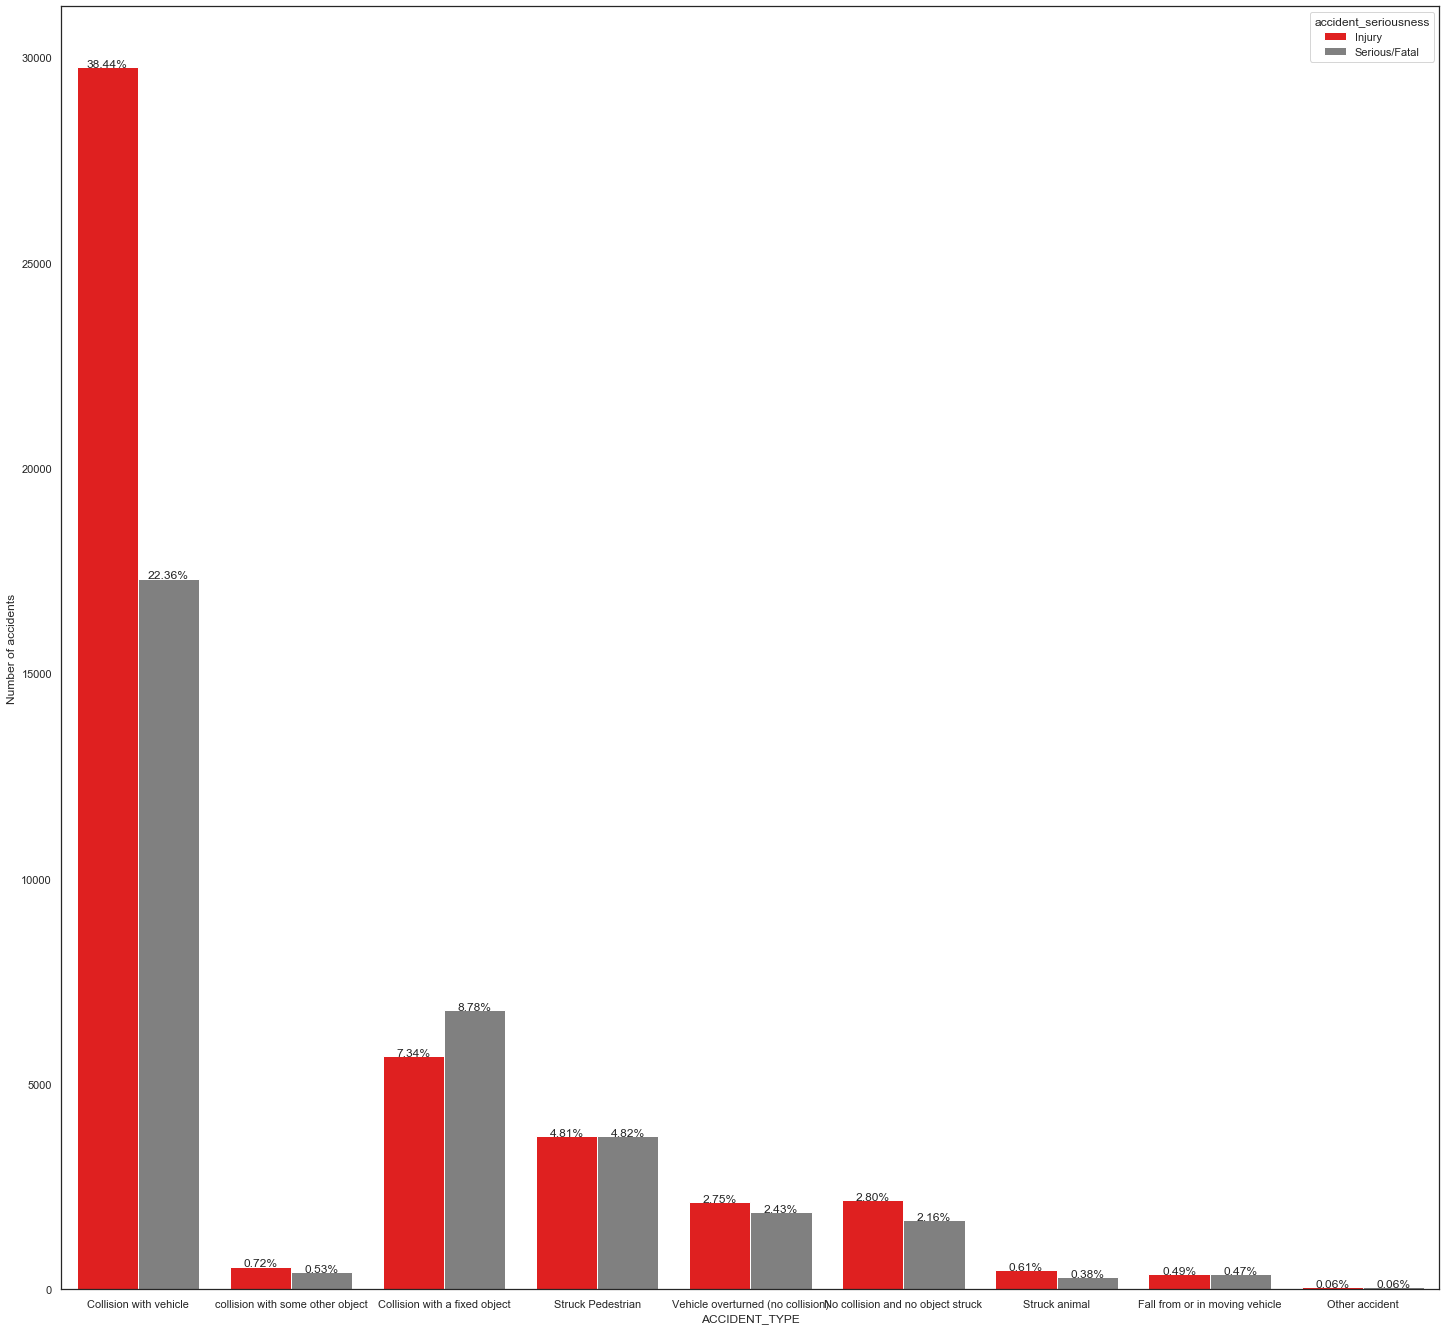

In [24]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="ACCIDENT_TYPE", hue="accident_seriousness",data=data)
ax.set(xlabel="ACCIDENT_TYPE",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [25]:
# prepare dataframe with simple counts
counts = data.groupby(['DAY_OF_WEEK', 'accident_seriousness']).size()

counts = counts.rename_axis(['DAY_OF_WEEK', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
DAY_OF_WEEK,,
Friday,7035,5049
Monday,6449,4360
Saturday,4501,4394
Sunday,6164,4842
Thursday,7066,4782
Tuesday,6825,4374
Wednesday,6869,4706


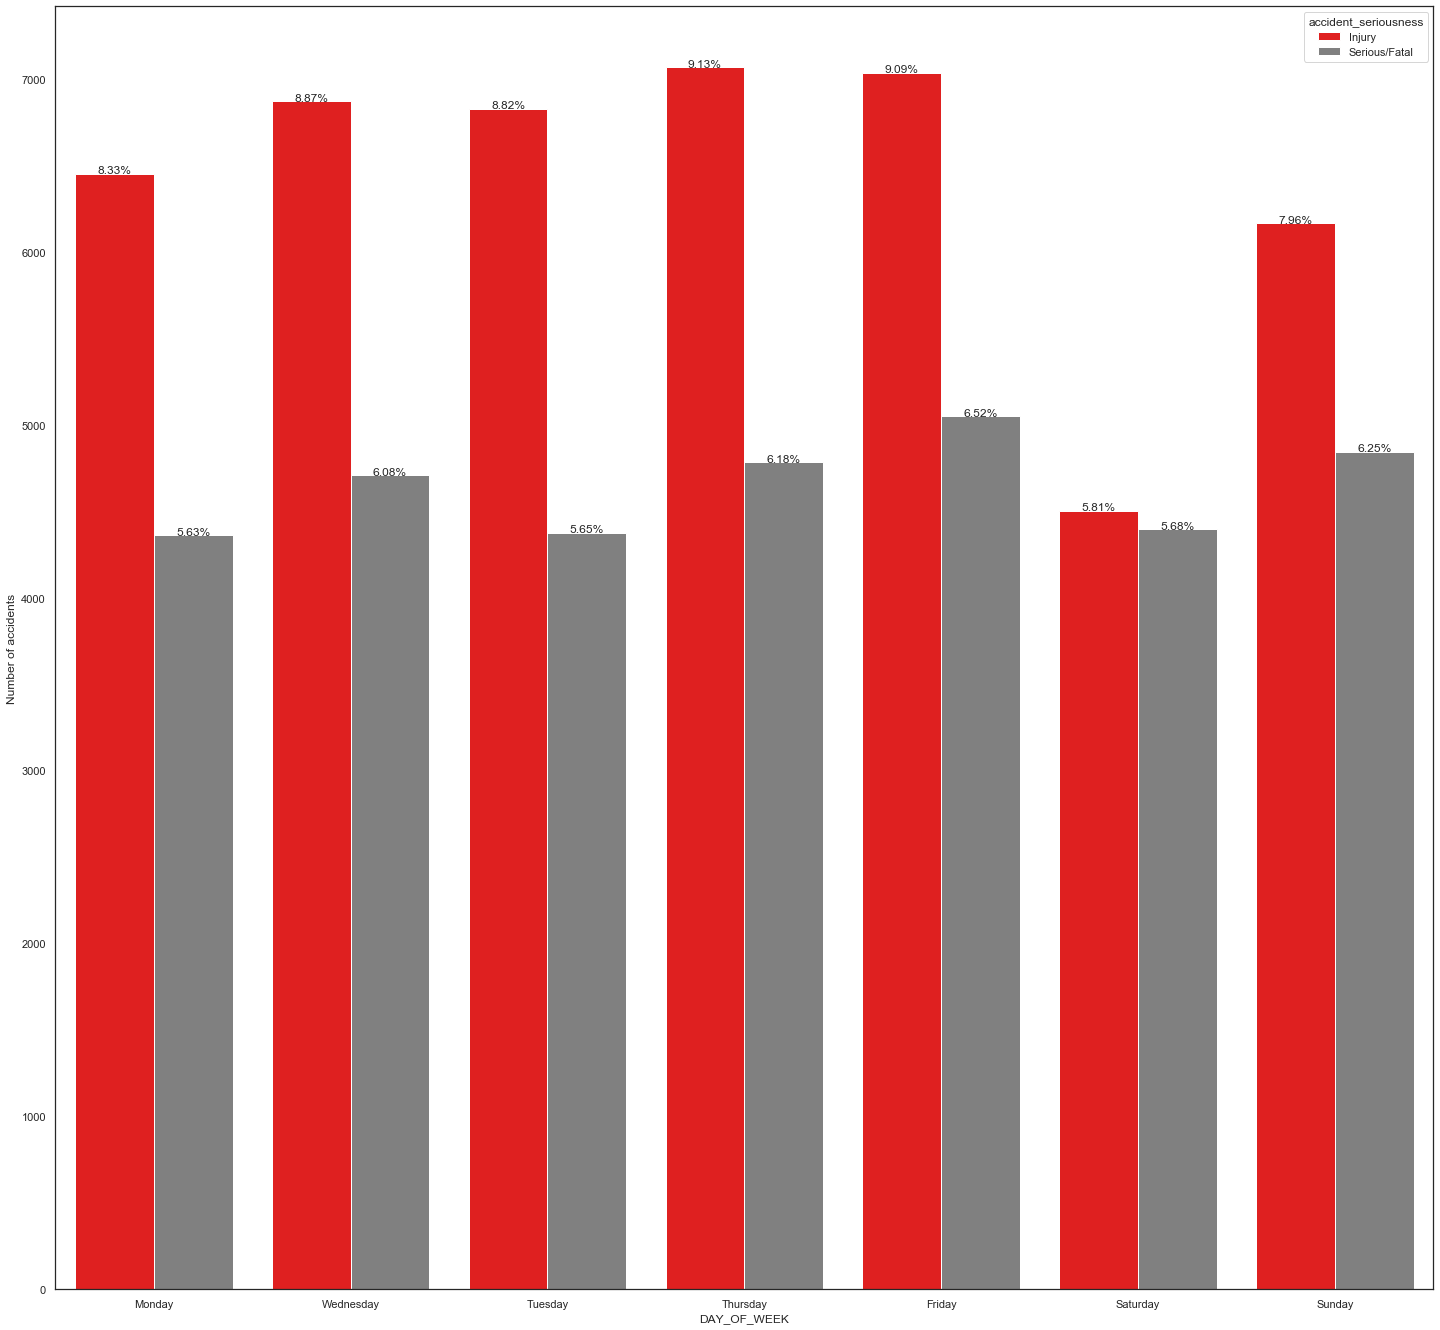

In [26]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="DAY_OF_WEEK", hue="accident_seriousness",data=data)
ax.set(xlabel="DAY_OF_WEEK",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [27]:
# prepare dataframe with simple counts
counts = data.groupby(['HIT_RUN_FLAG', 'accident_seriousness']).size()

counts = counts.rename_axis(['HIT_RUN_FLAG', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
HIT_RUN_FLAG,,
No,41721,31024
Not known,202,159
Yes,2986,1324


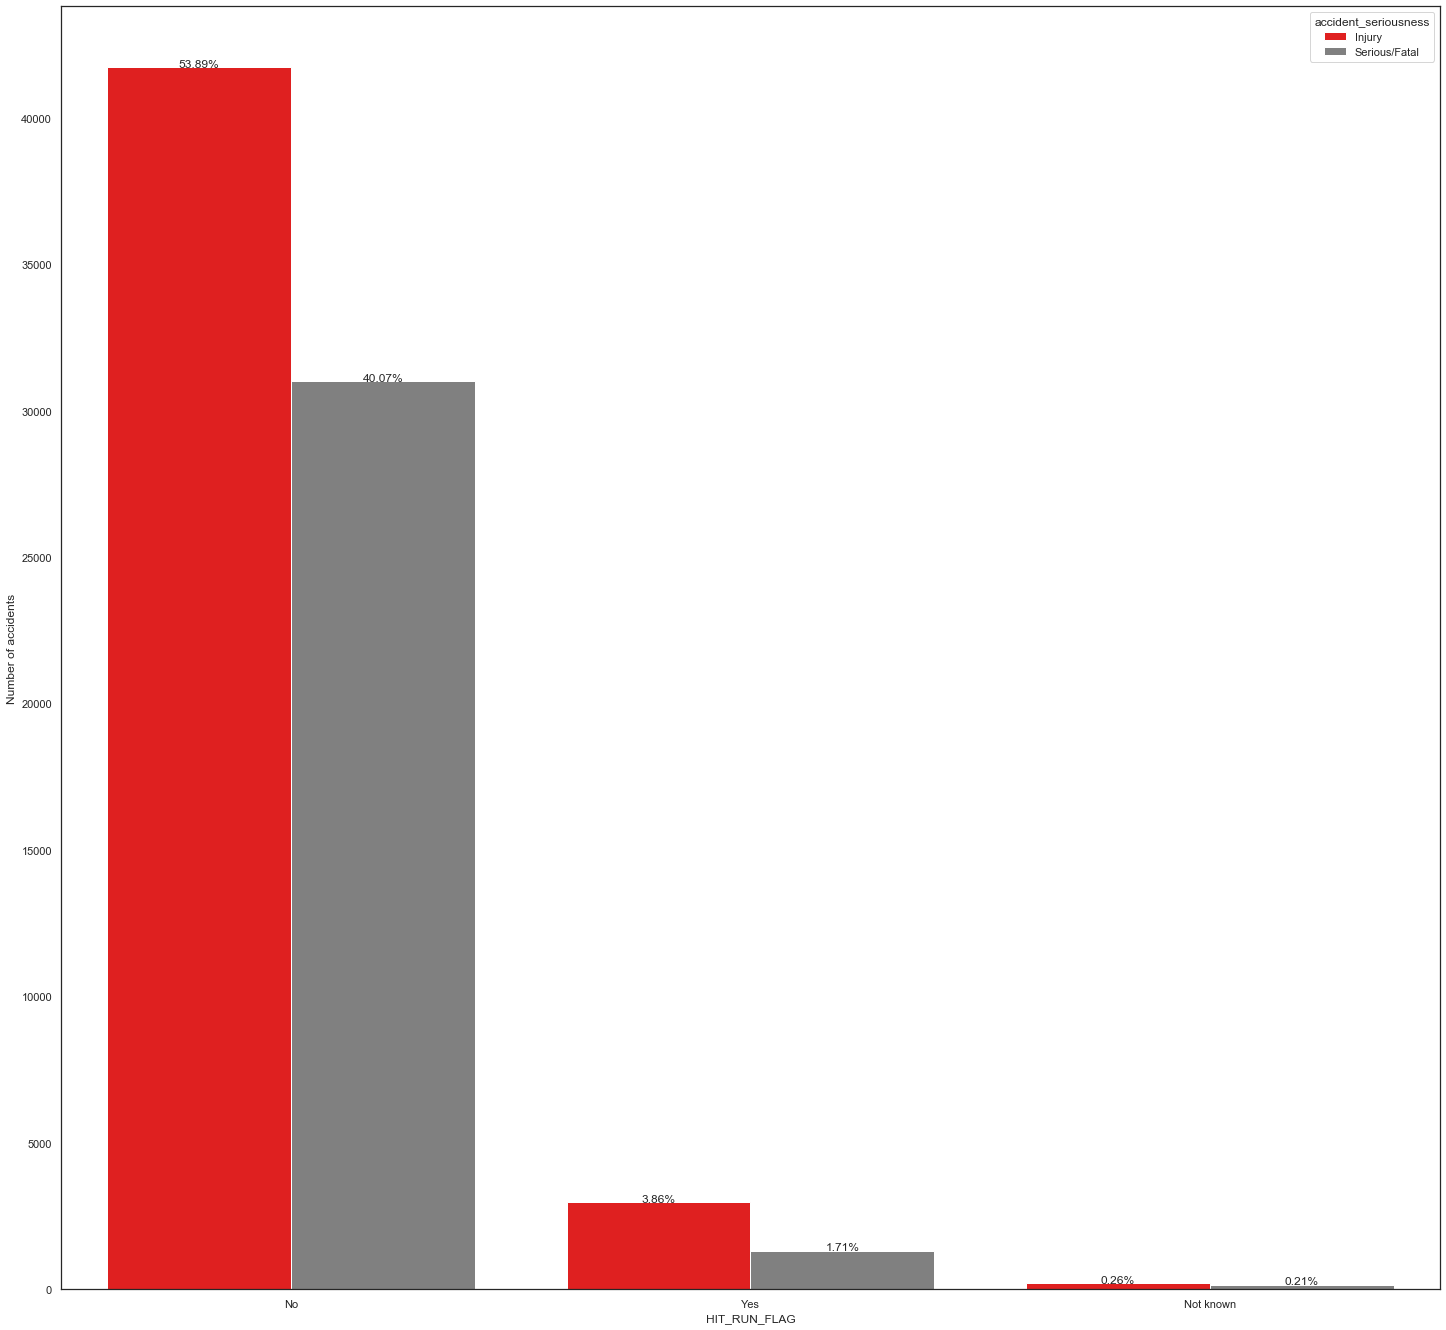

In [28]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="HIT_RUN_FLAG", hue="accident_seriousness",data=data)
ax.set(xlabel="HIT_RUN_FLAG",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [29]:
# prepare dataframe with simple counts
counts = data.groupby(['LIGHT_CONDITION', 'accident_seriousness']).size()

counts = counts.rename_axis(['LIGHT_CONDITION', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
LIGHT_CONDITION,,
Dark No street lights,1955,2333
Dark Street lights off,85,78
Dark Street lights on,6468,5244
Dark Street lights unknown,556,249
Day,30342,21438
Dusk/Dawn,3927,2712
Unk.,1576,453


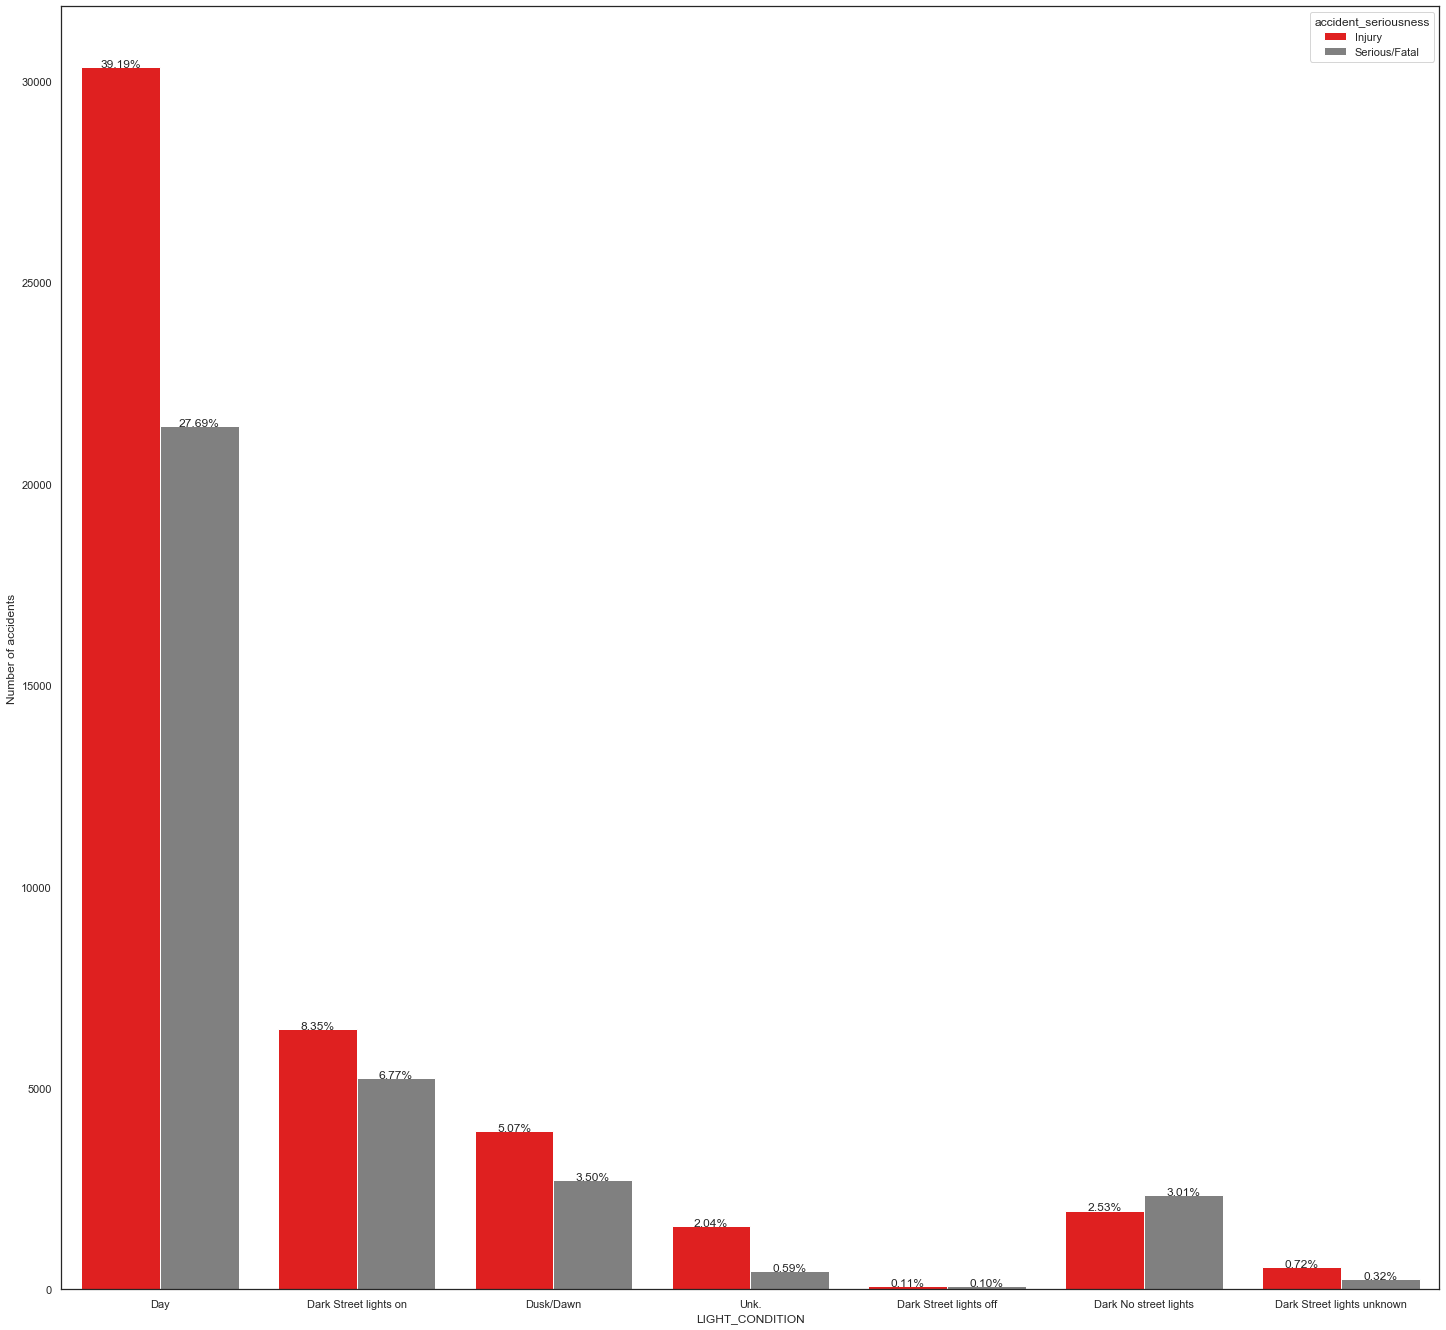

In [30]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="LIGHT_CONDITION", hue="accident_seriousness",data=data)
ax.set(xlabel="LIGHT_CONDITION",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [31]:
# prepare dataframe with simple counts
counts = data.groupby(['POLICE_ATTEND', 'accident_seriousness']).size()

counts = counts.rename_axis(['POLICE_ATTEND', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
POLICE_ATTEND,,
No,15069,3995
Not known,195,89
Yes,29645,28423


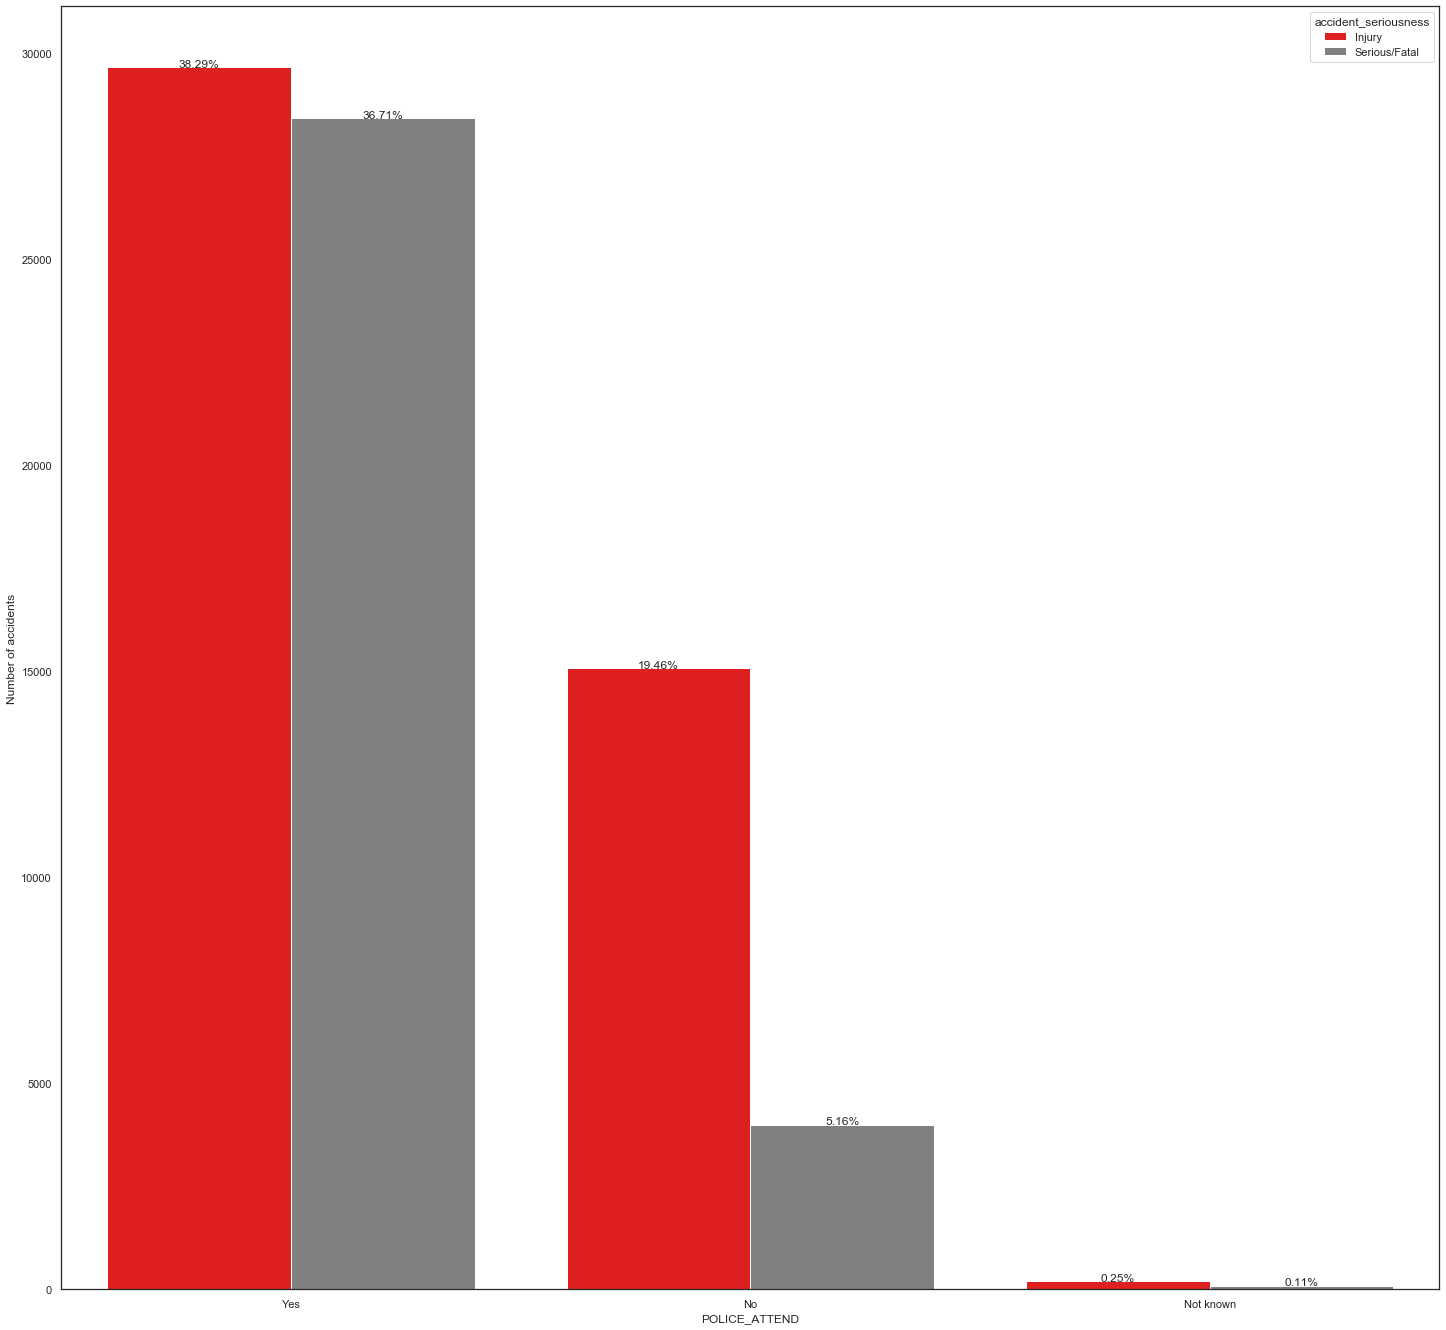

In [32]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="POLICE_ATTEND", hue="accident_seriousness",data=data)
ax.set(xlabel="POLICE_ATTEND",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [33]:
# prepare dataframe with simple counts
counts = data.groupby(['ROAD_GEOMETRY', 'accident_seriousness']).size()

counts = counts.rename_axis(['ROAD_GEOMETRY', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
ROAD_GEOMETRY,,
Cross intersection,10011,5932
Dead end,57,48
Multiple intersection,929,599
Not at intersection,22022,18067
Private property,786,600
Road closure,2,2
T intersection,9779,6580
Unknown,1219,622
Y intersection,104,57


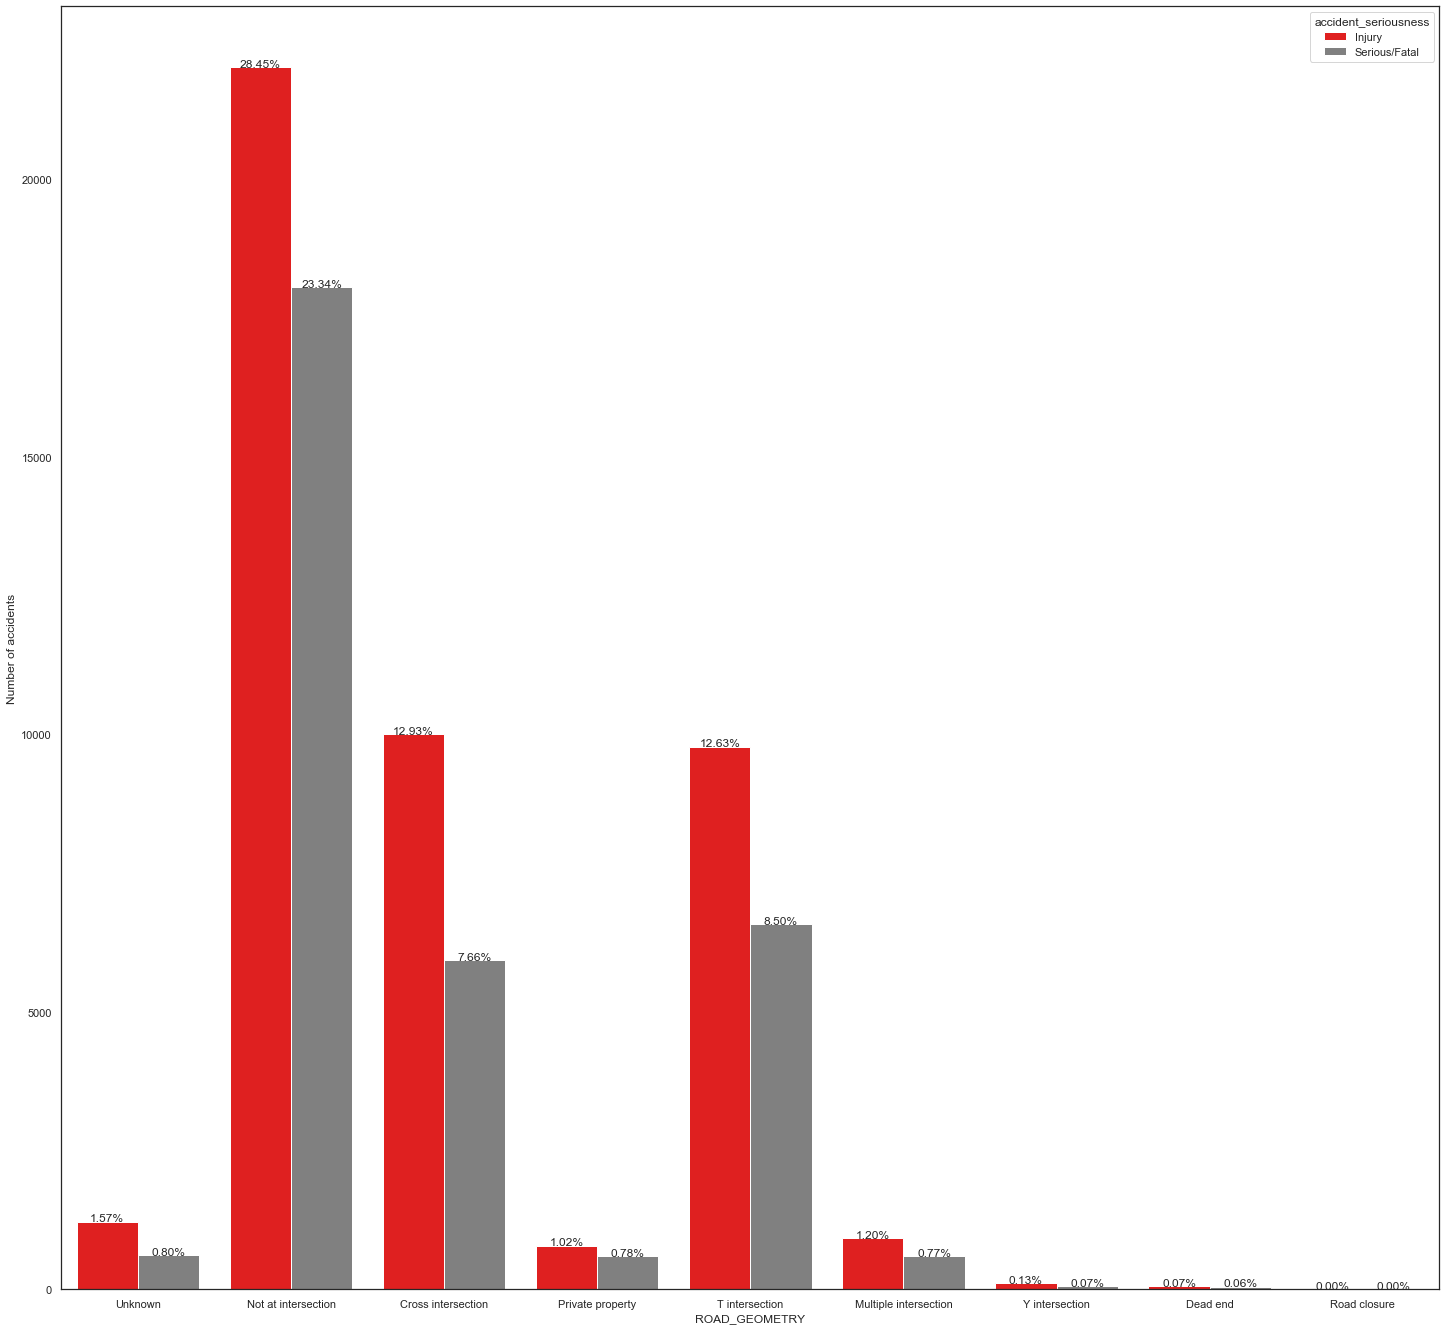

In [34]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="ROAD_GEOMETRY", hue="accident_seriousness",data=data)
ax.set(xlabel="ROAD_GEOMETRY",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [35]:
# prepare dataframe with simple counts
counts = data.groupby(['SPEED_ZONE', 'accident_seriousness']).size()

counts = counts.rename_axis(['SPEED_ZONE', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
SPEED_ZONE,,
100 km/hr,5026,5968
110 km/hr,418,405
30km/hr,145,91
40 km/hr,2911,1569
50 km/hr,7454,4644
60 km/hr,14768,9558
70 km/hr,2603,1937
75 km/hr,3,8
80 km/hr,5736,4952


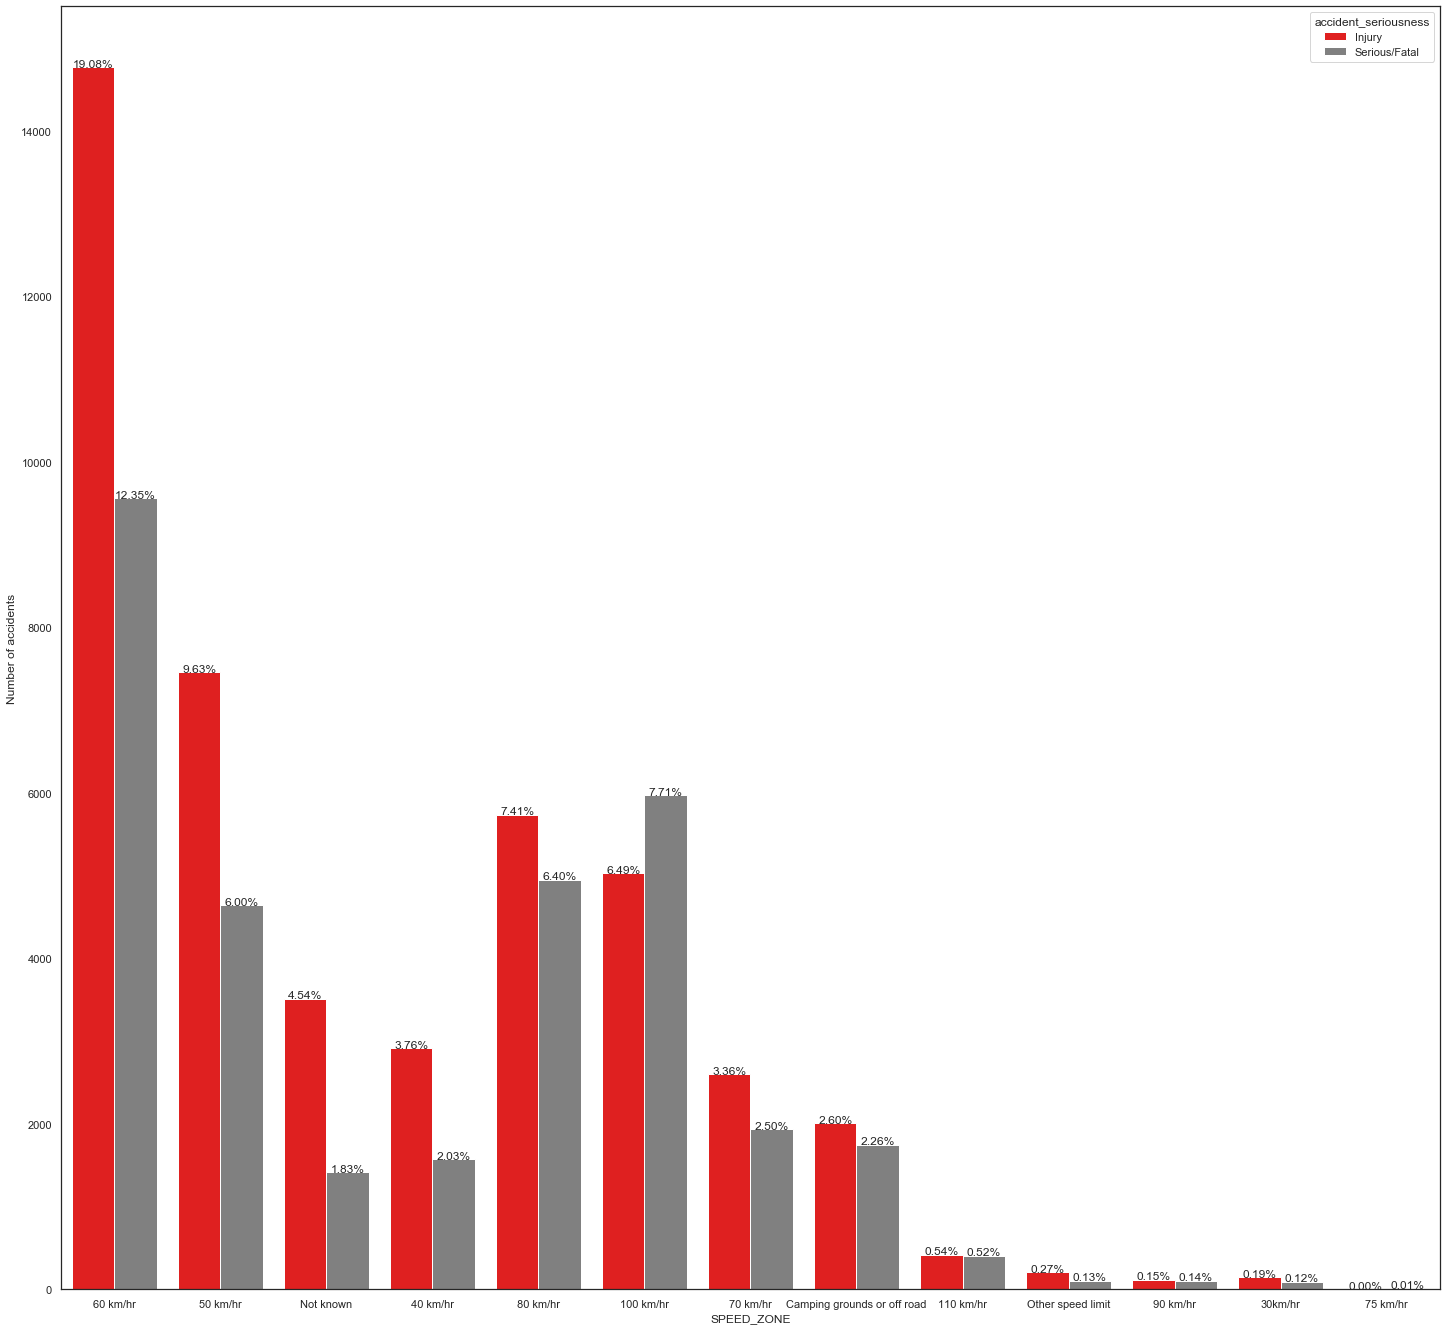

In [36]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="SPEED_ZONE", hue="accident_seriousness",data=data)
ax.set(xlabel="SPEED_ZONE",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [37]:
# prepare dataframe with simple counts
counts = data.groupby(['RUN_OFFROAD', 'accident_seriousness']).size()

counts = counts.rename_axis(['RUN_OFFROAD', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
RUN_OFFROAD,,
No,38461,24953
Yes,6448,7554


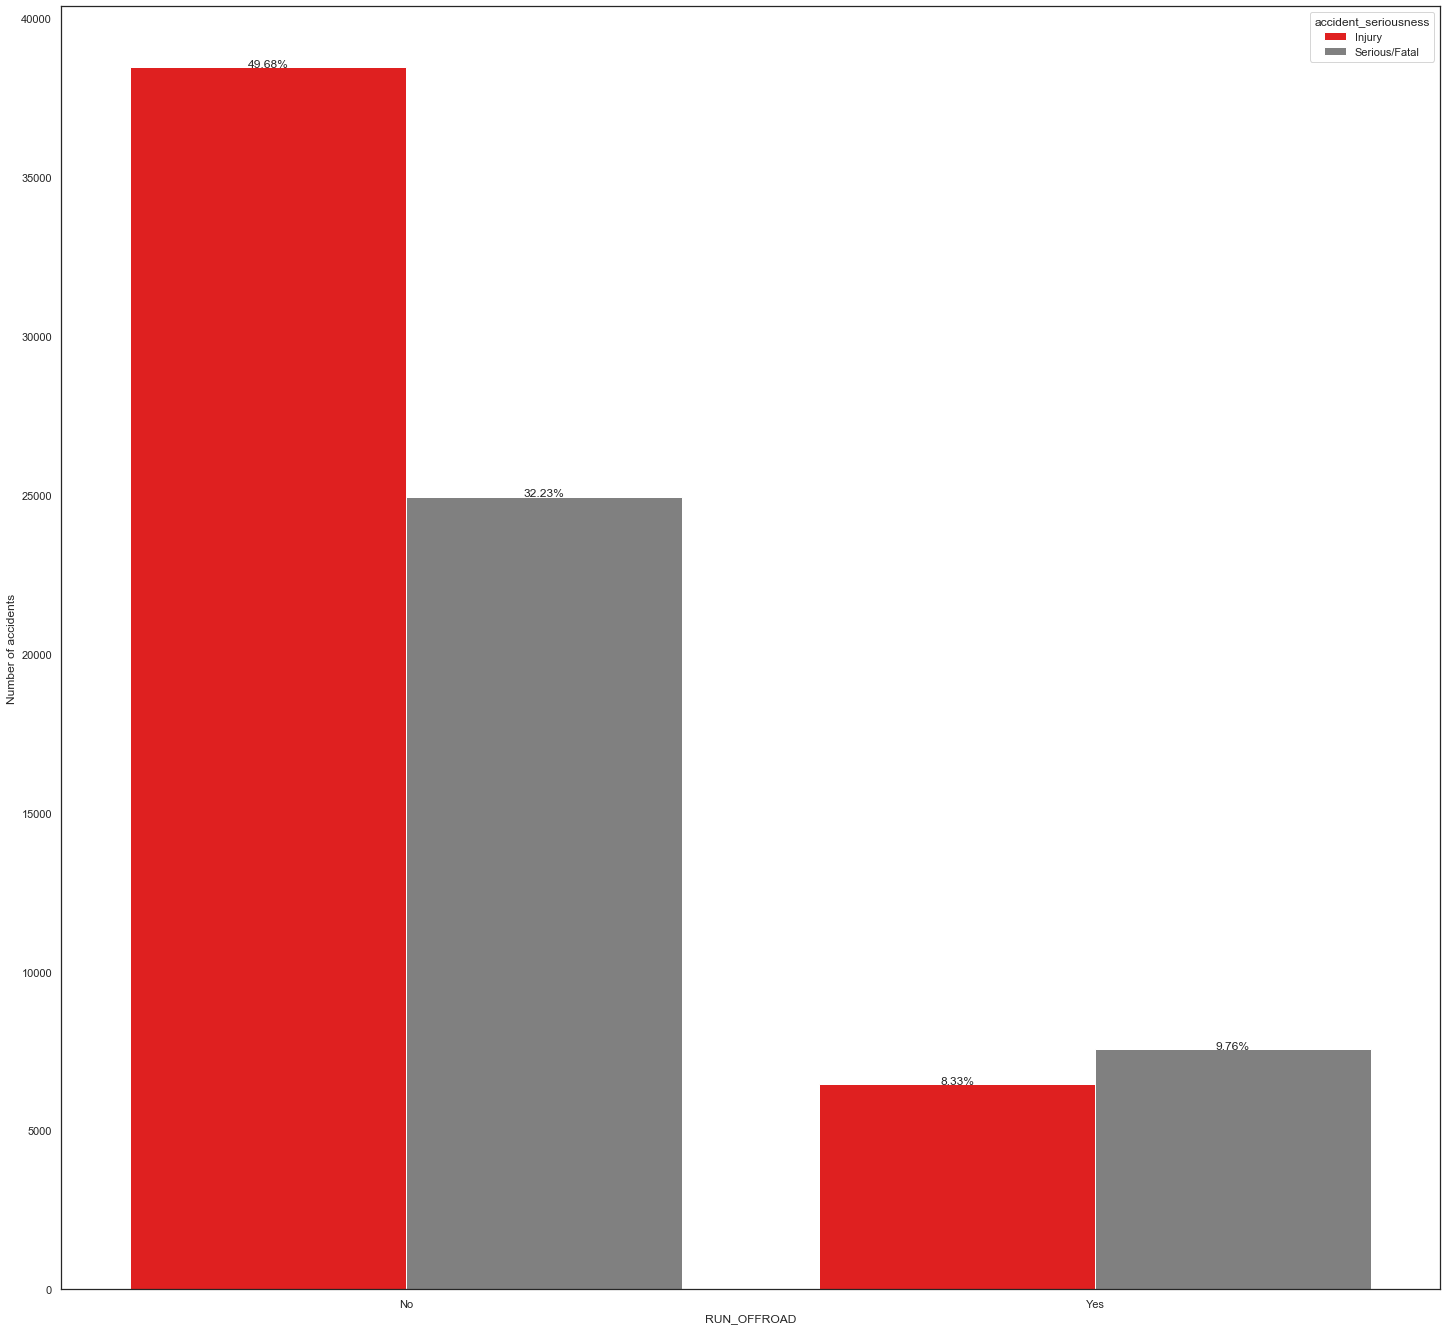

In [38]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="RUN_OFFROAD", hue="accident_seriousness",data=data)
ax.set(xlabel="RUN_OFFROAD",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [39]:
# prepare dataframe with simple counts
counts = data.groupby(['PILLION', 'accident_seriousness']).size()

counts = counts.rename_axis(['PILLION', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
PILLION,,
0.0,44747,32261
1.0,161,242
2.0,1,4


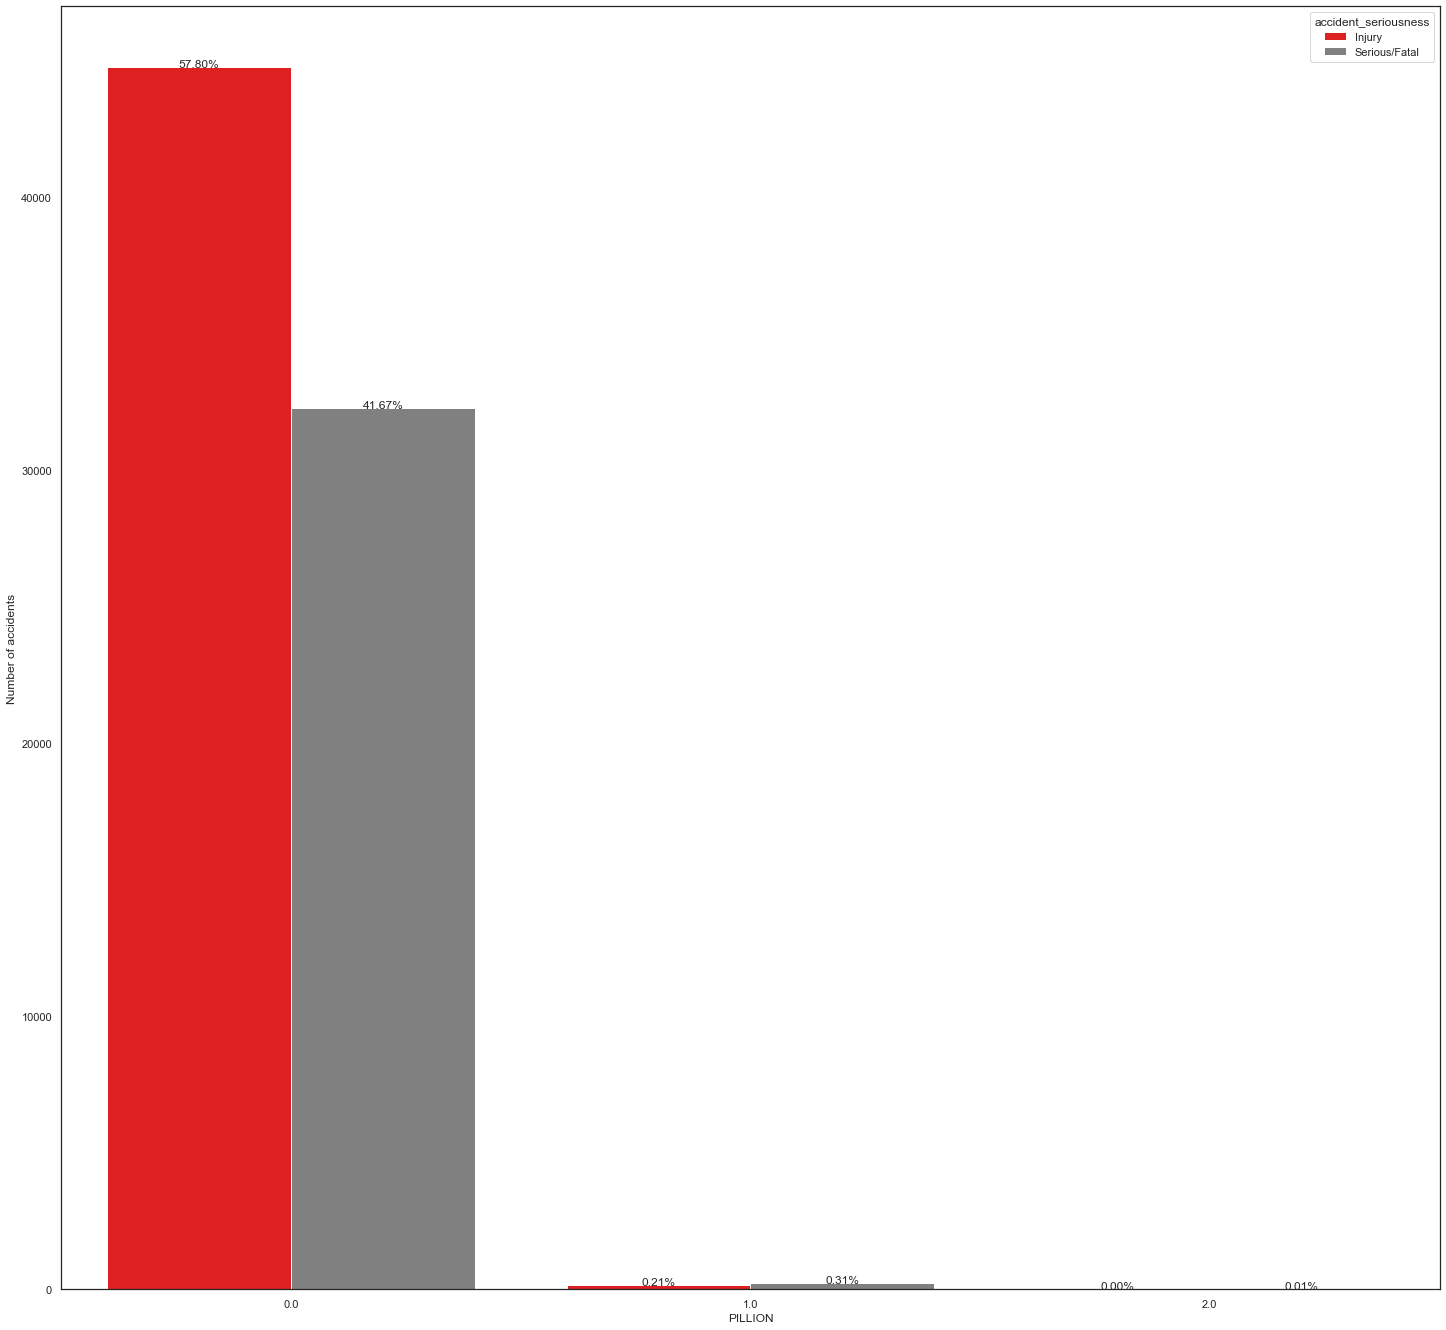

In [40]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="PILLION", hue="accident_seriousness",data=data)
ax.set(xlabel="PILLION",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [41]:
# prepare dataframe with simple counts
counts = data.groupby(['ALCOHOL_RELATED', 'accident_seriousness']).size()

counts = counts.rename_axis(['ALCOHOL_RELATED', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
ALCOHOL_RELATED,,
No,44085,30907
Yes,824,1600


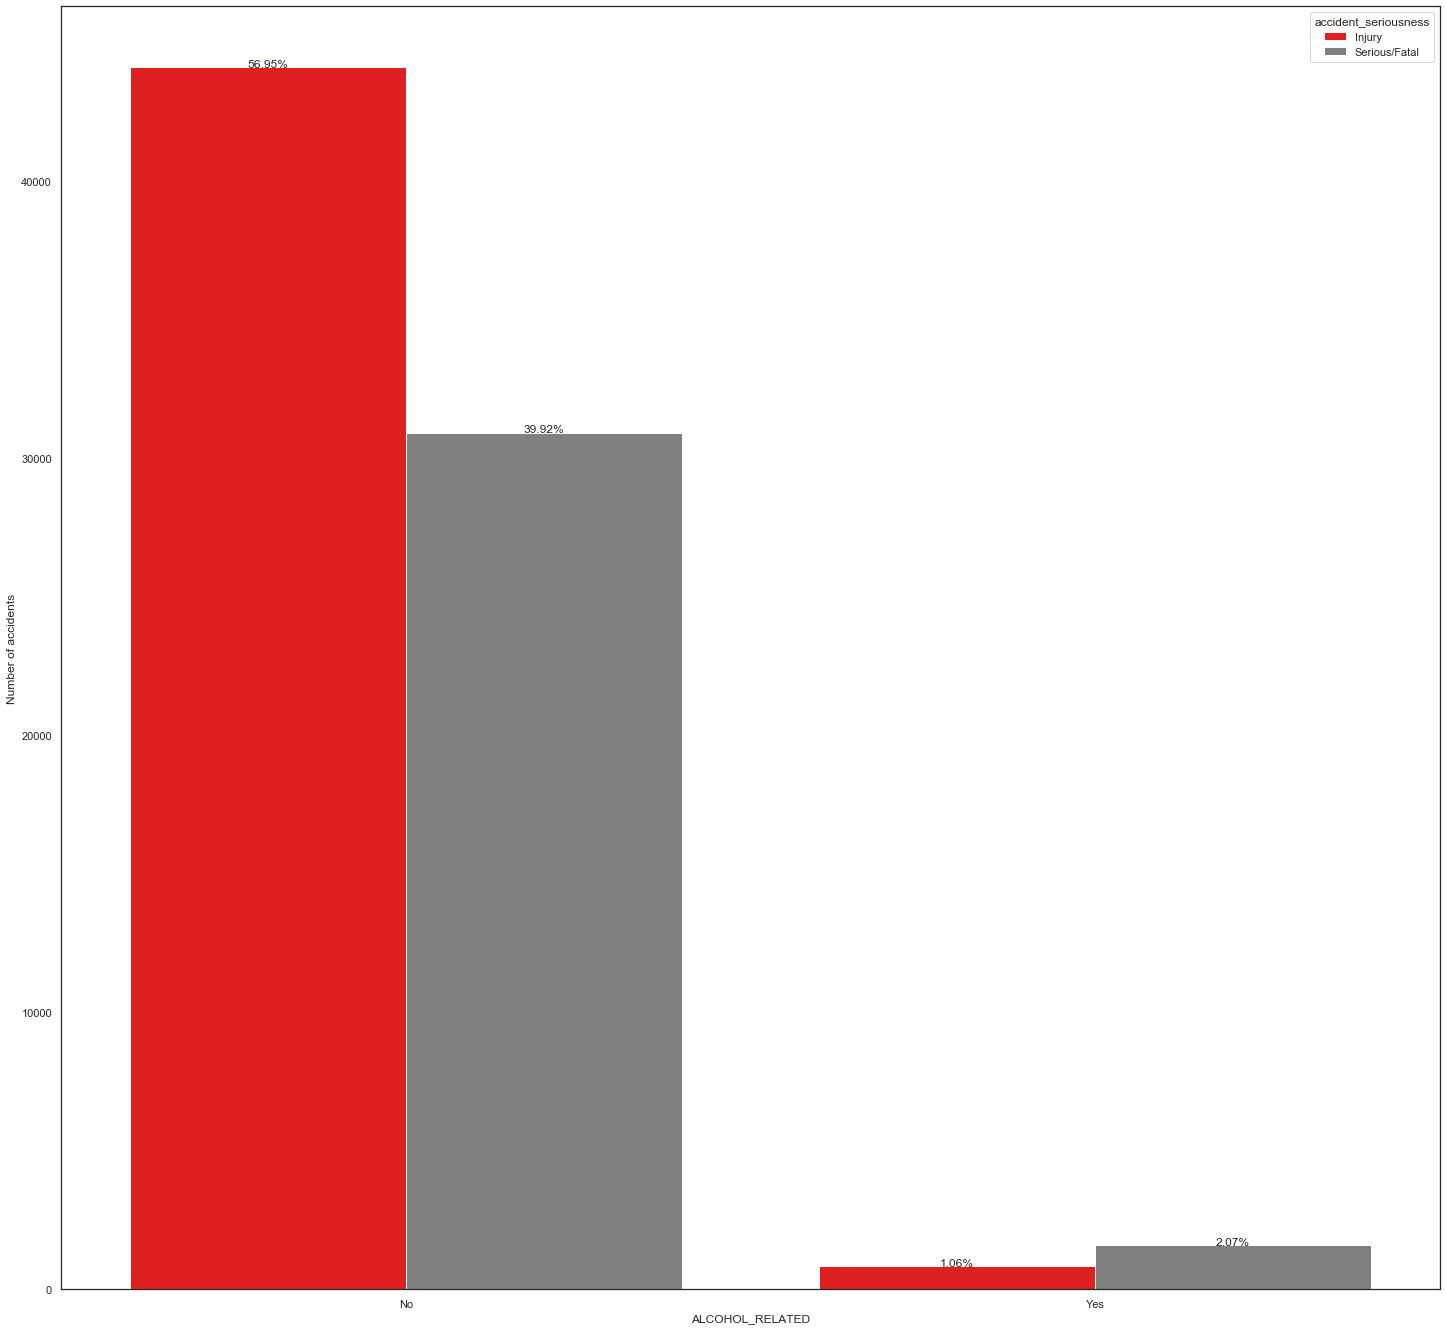

In [42]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="ALCOHOL_RELATED", hue="accident_seriousness",data=data)
ax.set(xlabel="ALCOHOL_RELATED",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [43]:
# prepare dataframe with simple counts
counts = data.groupby(['UNLICENCSED', 'accident_seriousness']).size()

counts = counts.rename_axis(['UNLICENCSED', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
UNLICENCSED,,
0.0,43555,31254
1.0,1346,1243
2.0,8,10


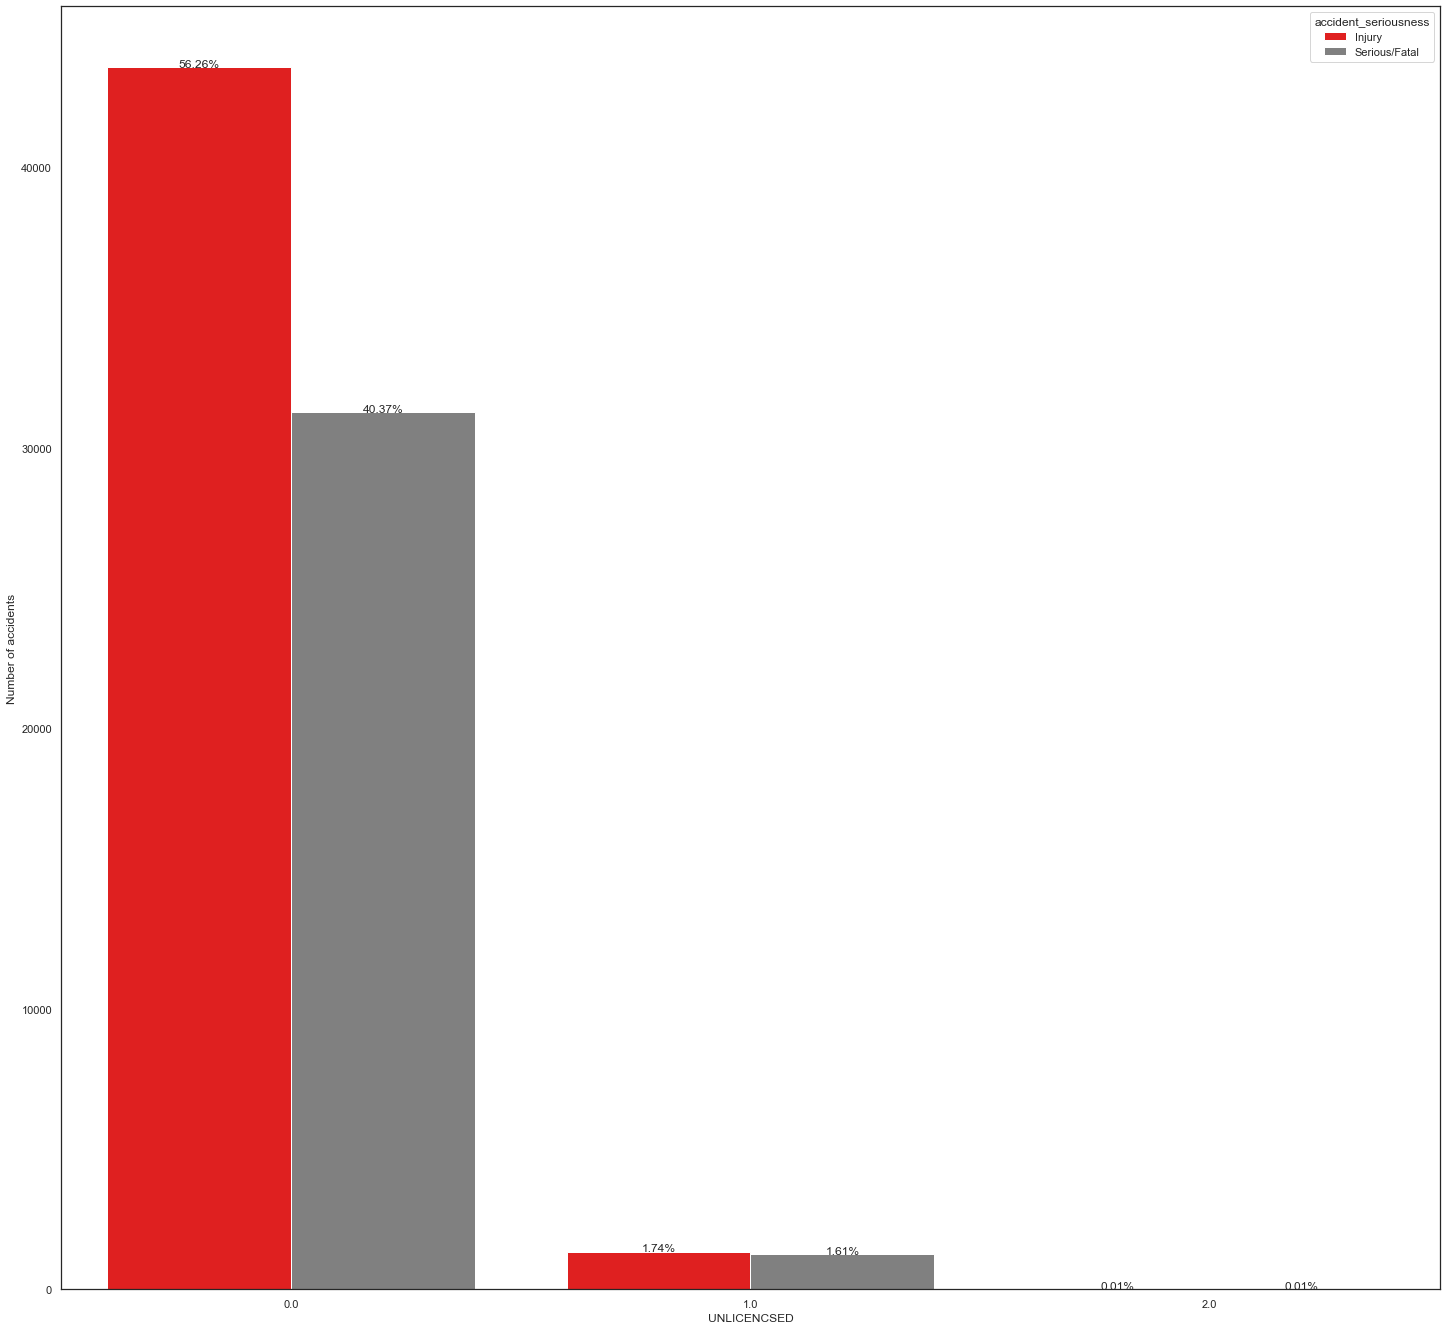

In [44]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="UNLICENCSED", hue="accident_seriousness",data=data)
ax.set(xlabel="UNLICENCSED",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [45]:
# prepare dataframe with simple counts
counts = data.groupby(['DIVIDED', 'accident_seriousness']).size()

counts = counts.rename_axis(['DIVIDED', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
DIVIDED,,
Divided,16519,10982
Undivided,28390,21525


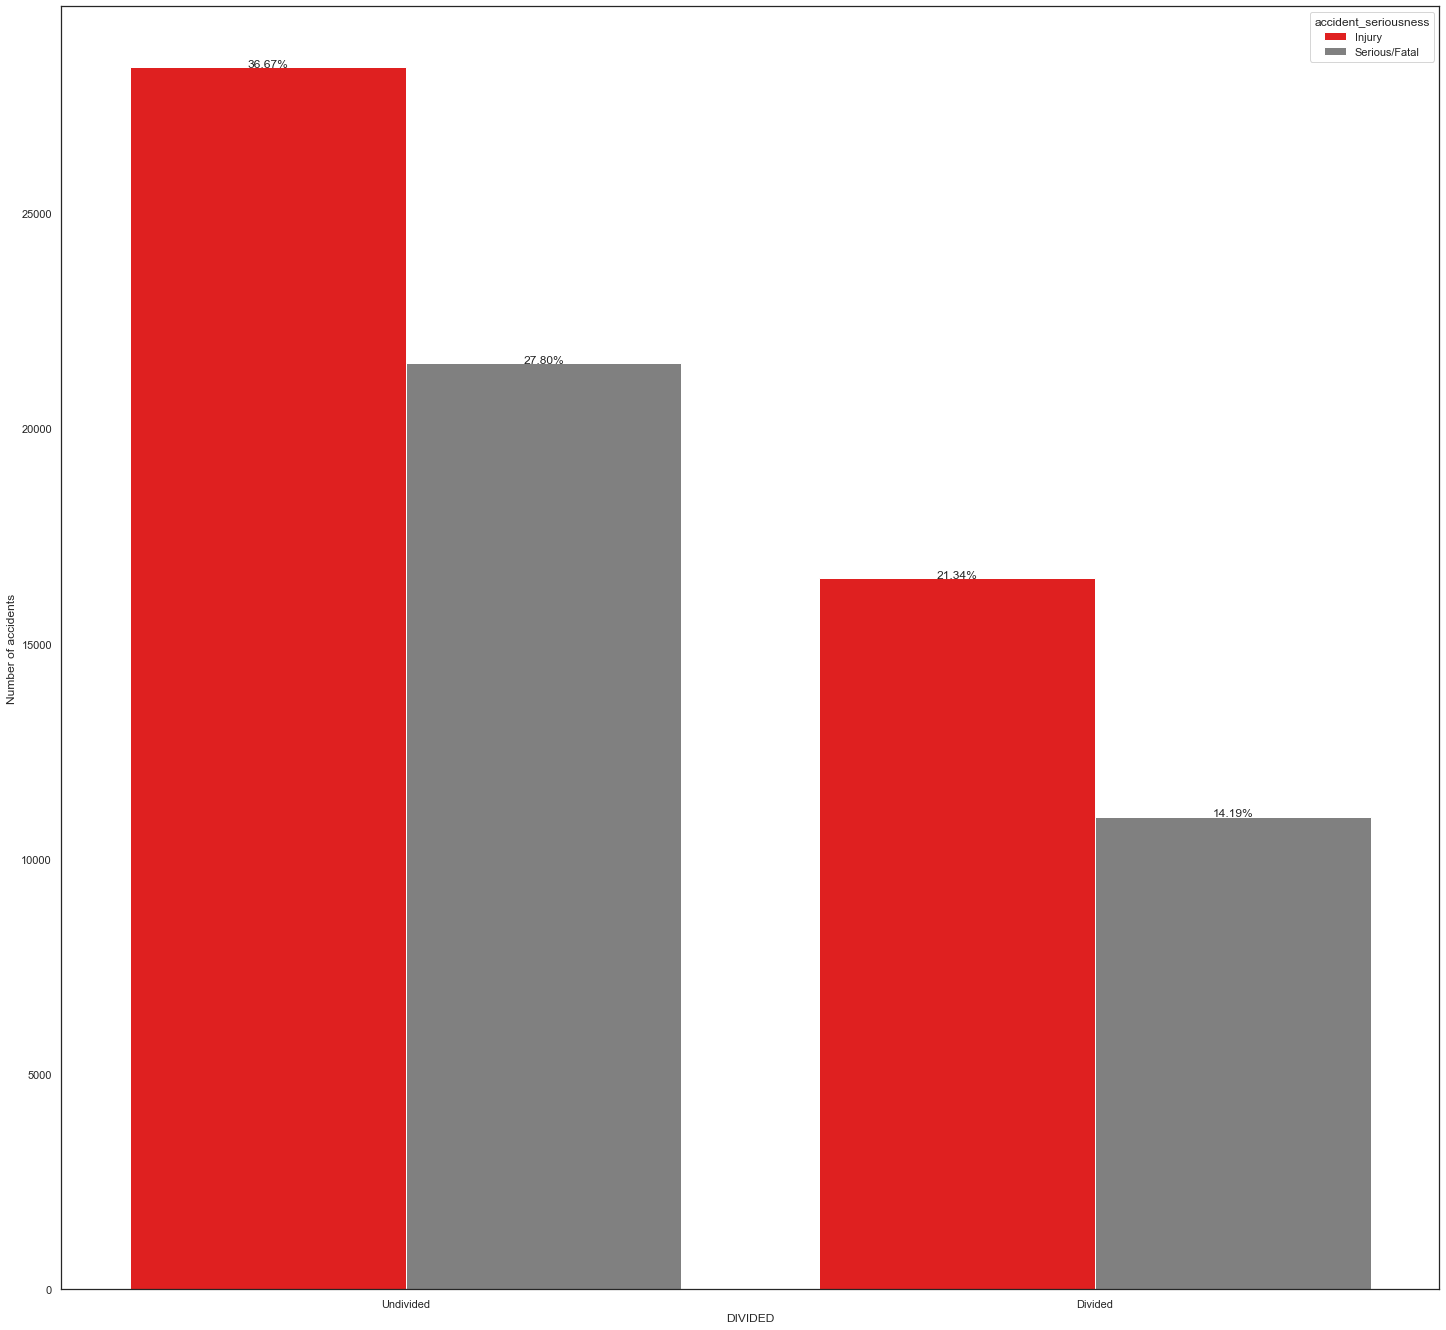

In [46]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="DIVIDED", hue="accident_seriousness",data=data)
ax.set(xlabel="DIVIDED",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [47]:
# prepare dataframe with simple counts
counts = data.groupby(['time_of_day', 'accident_seriousness']).size()

counts = counts.rename_axis(['time_of_day', 'accident_seriousness'])\
                                .unstack('accident_seriousness')\
                                .rename({ 1:'Injury', 2:'Serious/Fatal'}, axis='columns')
counts

accident_seriousness,Injury,Serious/Fatal
time_of_day,,
1,8540,5856
2,5049,3720
3,5706,3914
4,6751,4610
5,7456,4952
6,7415,5501
7,3992,3954


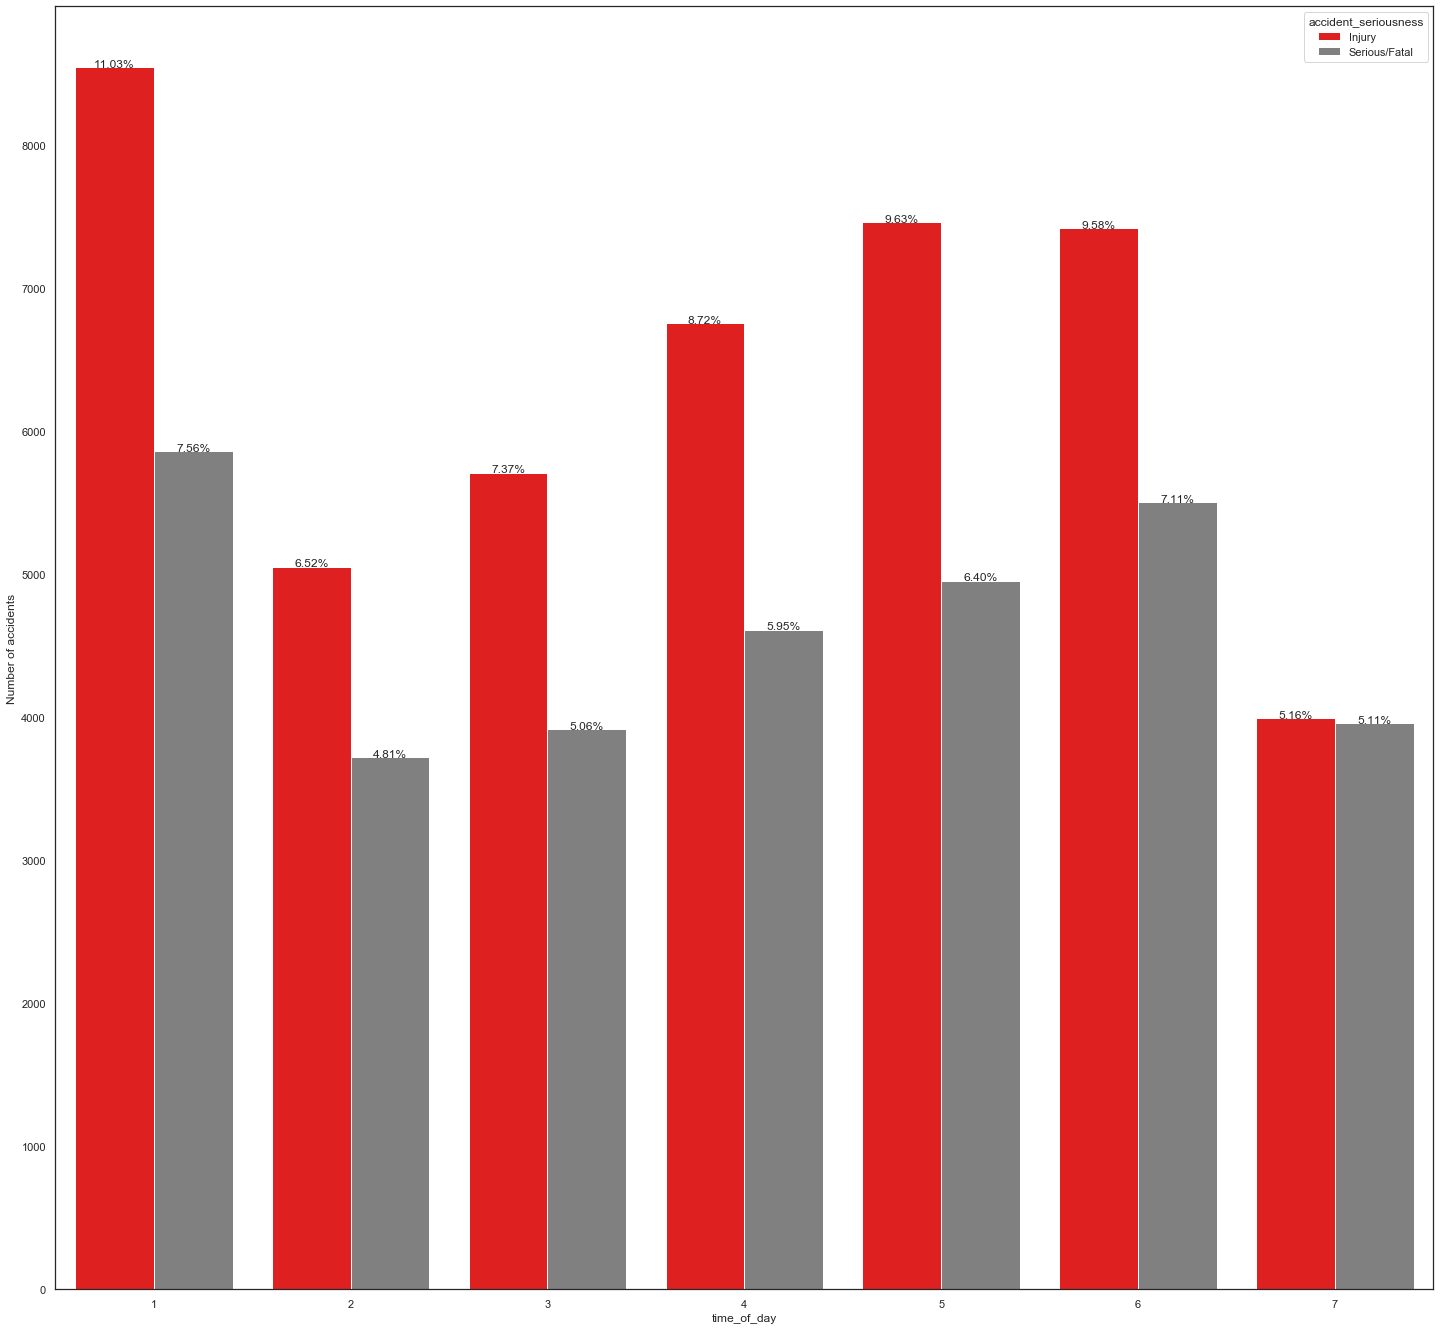

In [48]:
plt.figure(figsize=(22,22))
sns.set(style="white")
custom_palette=["red","grey"]
sns.set_palette(custom_palette)
total=float(len(data))
ax=sns.countplot(x="time_of_day", hue="accident_seriousness",data=data)
ax.set(xlabel="time_of_day",ylabel="Number of accidents")

for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height+3,
           '{:1.2%}'.format(height/total),
           ha="center")
plt.show()

In [59]:
# Imports and initial setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown, display
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
plt.style.use('fivethirtyeight')
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
import seaborn as sns
import time
from IPython.display import Image
import matplotlib as mpl
# Undersampling and Oversampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
%matplotlib inline
import matplotlib.pyplot as plt
# Classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb
import matplotlib as mpl
# Metrics & Corss-Validation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, make_scorer, classification_report, confusion_matrix)
import statsmodels
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
#from pandas_profiling import ProfileReport
#import plotly.express as px
import pprint
import plotly.graph_objs as go
import matplotlib as mpl
import calendar
import warnings
import warnings
warnings.filterwarnings('ignore')

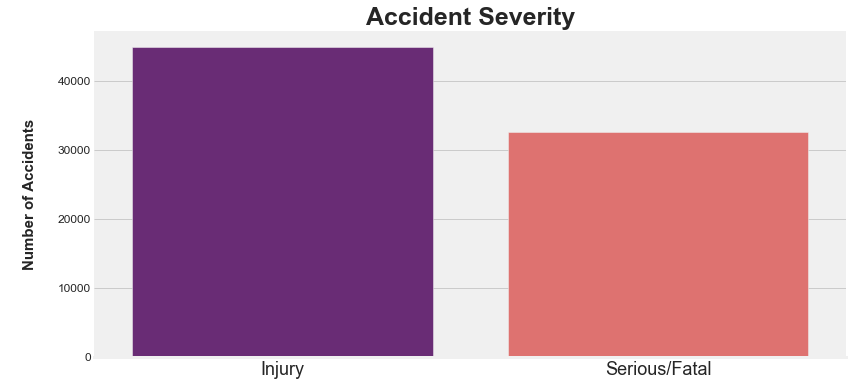

In [50]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="accident_seriousness", palette="magma", data=data)

plt.title("Accident Severity",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('accident_seriousness.png')
plt.show()

In [51]:
for col in set(data.columns) - set(data.describe().columns):
    data[col] = data[col].astype('category')

In [52]:
encoding = {
"accident_seriousness": {"Injury": 0, "Serious/Fatal": 1}
}
data.replace(encoding, inplace=True)
print(data['accident_seriousness'].value_counts())

0    44909
1    32507
Name: accident_seriousness, dtype: int64


In [53]:
#split the data

X = data[['ACCIDENT_STATUS','ALCOHOLTIME','ACCIDENT_TYPE','DAY_OF_WEEK','HIT_RUN_FLAG','LIGHT_CONDITION'       
,'POLICE_ATTEND','ROAD_GEOMETRY','SPEED_ZONE','TOTAL_PERSONS','MALES','FEMALES','BICYCLIST'           
,'PASSENGER','PILLION','ALCOHOL_RELATED','UNLICENCSED','NO_OF_VEHICLES','HEAVYVEHICLE','PASSENGERVEHICLE'     
,'MOTORCYCLE','PUBLICVEHICLE','month','time_of_day'  ]]
y = data['accident_seriousness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(61932, 24)
(61932,)

Test set size
(15484, 24)
(15484,)


Text(0.5, 0, 'Relative Feature Importance with Random Forest')

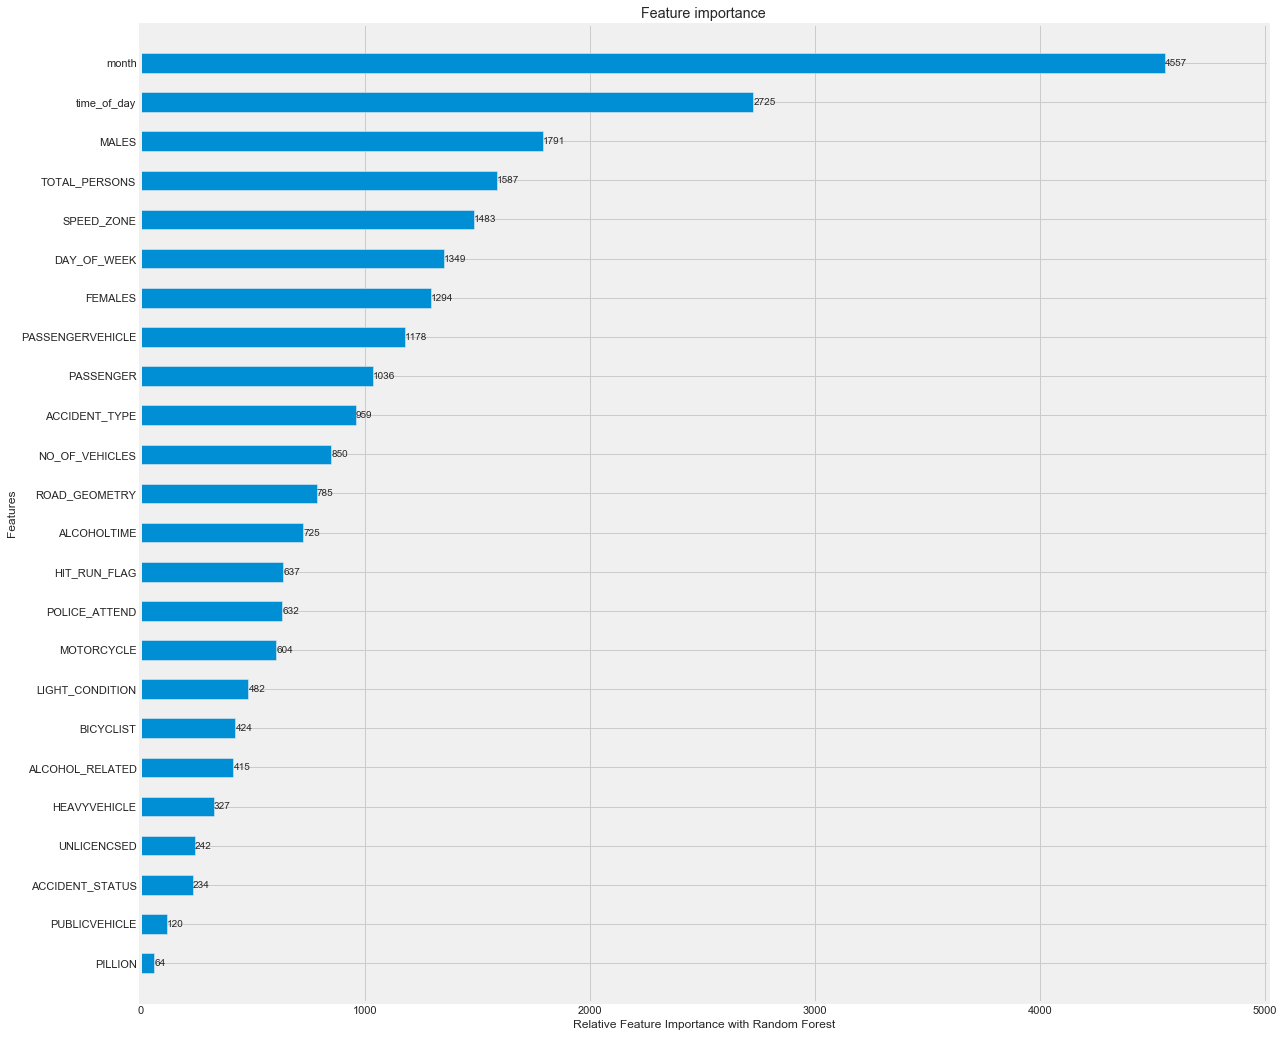

In [60]:
from matplotlib import pyplot
from lightgbm import plot_importance, plot_tree
import lightgbm as lgbm
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(learning_rate =0.03, max_depth=40, min_data_in_leaf=10,
                   n_estimators=500, num_leaves=50, random_state = 42)
lgbm_clf.fit(X_train,y_train)
plot_importance(lgbm_clf,height=0.5,figsize=(18,18))
plt.xlabel('Relative Feature Importance with Random Forest')